# Install and imports

In [1]:
# installations
!pip install sktime
!pip install numba
!pip install shap

     |████████████████████████████████| 6.6 MB 7.9 MB/s 
     |████████████████████████████████| 9.8 MB 27.5 MB/s 
     |████████████████████████████████| 3.3 MB 34.8 MB/s 
     |████████████████████████████████| 34.5 MB 11 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2
     |████████████████████████████████| 564 kB 25.7 MB/s 


In [2]:
import pandas as pd
from sktime.datatypes._panel._convert import (
    from_2d_array_to_nested,
    from_nested_to_2d_array,
    is_nested_dataframe,
)
import matplotlib.pyplot as plt
import random
import itertools

import shap
import numpy as np
from random import randint
from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split

from sklearn.linear_model import RidgeClassifierCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# takes a while to import
from sktime.transformations.panel.rocket import Rocket
from sklearn import preprocessing

# Gunpoint - old vs oung
Skip to next section to use the dataset that is is used in the paper.

If desired other data can be applied to the framwork. Labels have to be adapted to be integers starting at 0 as done below for the Gunpoint dataset.

In [ ]:
#  https://www.timeseriesclassification.com/description.php?Dataset=GunPointOldVersusYoung

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sktime.datasets import load_from_tsfile_to_dataframe
path_to_TEST = '/content/drive/GunPointOldVersusYoung_TEST.ts'
path_to_TRAIN = '/content/drive/GunPointOldVersusYoung_TRAIN.ts'
X_train, y_train_str = load_from_tsfile_to_dataframe(path_to_TRAIN)
X_test, y_test_str = load_from_tsfile_to_dataframe(path_to_TEST)

In [ ]:
len(X_train)

136

In [ ]:
len(X_test)

315

In [ ]:
# 1 = young
# 2 = old
y_test_str

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [ ]:
y_train = y_train_str.astype(int)
y_test = y_test_str.astype(int)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
#changing labels to 0 and 1 instead of 1 and 2 --> easier for handling shap values later
# 0 = young
# 1 = old
for i in range(len(y_test)):
  y_test[i] -= 1
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
for i in range(len(y_train)):
  y_train[i] -= 1
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

# Parameters setting


## Parameters first stage for general approach

In [3]:
# Parameters for stage one (see table below), to determine best general approach for getting activations

# shap weightage yes or no 
use_shap_weightage = True

# only positive shap values yes or no
use_only_positive_shap_values = True

# True: a weight is only considered if its product with timepoint is positive
# False: a weight is considered as long as the total activation for the current convolution is positive
# --> (general criterium for flagging ppv = 1)
weight_multiplication_positive = True  

# True: when adding the weight to the relevance vector the absolute values of the
# weight is used
# False: The weight is added to the relevance vector as is 
absolute_weight_values = True

In [4]:
# wether to use all kernels with shap values > 0  or define percentile of used kernels
# was not part of paper, can be explored
use_all_shap_values = True
# has to be defined if use_all_shap_values is False
percentile_of_used_kernels = 0.9
#---

In [5]:
lst = list(map(list, itertools.product([True, False], repeat=4)))
combinations_first_iteration = pd.DataFrame(lst)
combinations_first_iteration.columns = ['use_shap_weightage' , 'use_only_positive_shap_values', 'weight_multiplication_positive', 'using_absolute_weight_values']
combinations_first_iteration

,use_shap_weightage,use_only_positive_shap_values,weight_multiplication_positive,using_absolute_weight_values
0,True,True,True,True
1,True,True,True,False
2,True,True,False,True
3,True,True,False,False
4,True,False,True,True
5,True,False,True,False
6,True,False,False,True
7,True,False,False,False
8,False,True,True,True
9,False,True,True,False


In [6]:
#combinations_first_iteration.to_excel("combinations.xlsx")

In [7]:
# first row
combinations_first_iteration.iloc[0]

use_shap_weightage                True
use_only_positive_shap_values     True
weight_multiplication_positive    True
using_absolute_weight_values      True
Name: 0, dtype: bool

In [8]:
# index of row above -> current chosen combination
current_combination = 3

use_shap_weightage = combinations_first_iteration.iloc[current_combination][0]
use_only_positive_shap_values = combinations_first_iteration.iloc[current_combination][1]
weight_multiplication_positive = combinations_first_iteration.iloc[current_combination][2]
absolute_weight_values = combinations_first_iteration.iloc[current_combination][3]

## Parameters stage two to test robustness 

In [9]:
# Parameters for second iteration, to test the robustness of the approach and to see where to investigate further
# only change this settings after best approach is found from iteration 1

# If is_sin = False then cosine is the signal
is_sin = True 

# if anomalie_at_same_location = False then anomalie is at pseudorandom locations of time series
anomalie_at_same_location = True 

# wether to scale the single kernel activations before calculating the mean across kernels, can be explored
scale_each_kernel_before_mean = True
# only relevant if scale_each_kernel_before_mean = True
# select one of those. min max scale was used in paper. can be explored
min_max_scale = True
standard_scale = False

In [10]:
lst = list(map(list, itertools.product([True, False], repeat=2)))
combinations_second_iteration = pd.DataFrame(lst)
combinations_second_iteration.columns = ['is_sin' , 'anomalie_at_same_locatoin']
combinations_second_iteration

,is_sin,anomalie_at_same_locatoin
0,True,True
1,True,False
2,False,True
3,False,False


In [11]:
# first row
combinations_second_iteration.iloc[0]

is_sin                       True
anomalie_at_same_locatoin    True
Name: 0, dtype: bool

In [12]:
# select which of the above combinations should be run
current_combination = 0

is_sin = combinations_second_iteration.iloc[current_combination][0]
anomalie_at_same_location = combinations_second_iteration.iloc[current_combination][1]

## Other general parameters

In [13]:
# Other parameters

# number of instances per class
n = 100
# number of kernels used for rocket
amount_kernels = 500
# Set to True in case figures should be saved
save_figs = False
# directory where the figures are saved in collab. content is selected as first level
# subfolders have to be created first
!mkdir /content/directory
directory = "/content/directory/"

# Creating data 

In [14]:
def create_nested_timeseries(time_array, wavelength, create_sine_wave, amplitude = 1 , number_of_instances = 1):
  """
  creates a nested time series dataframe(see https://github.com/alan-turing-institute/sktime/blob/main/examples/loading_data.ipynb 
  for more information on nested time series dataframes).
  Depending on create_sine_wave it will generate data based on a sin wave or a cos wave according to the provided time points. 
  The amplitude is generated by applying the sin or cos function to each time point.
  y_values in this function means f(x) with f(x) being sin(x) or cos(x). This is pointed out since with y typically the label of an
  instance is meant (at least in the context of ML).
  """
  dataset = pd.DataFrame()
  for i in range(0, number_of_instances):
    
    if (create_sine_wave):
      y_values = amplitude * np.sin((2*np.pi / wavelength) * time_array)
    else:
      y_values = amplitude * np.cos((2*np.pi / wavelength) * time_array)
    
    dataframe = pd.DataFrame(y_values)
    # transpose to get a dataframe of shape (n_rows = number of instances, n_columns = number of time points)
    transposed_dataframe = dataframe.transpose()
    dataset = dataset.append(transposed_dataframe)

  # convert to nested dataframe format, see: https://github.com/alan-turing-institute/sktime/blob/main/examples/loading_data.ipynb
  nested_dataframe = from_2d_array_to_nested(dataset)

  return nested_dataframe

In [15]:
# length for each time series instance
time_points = np.arange(0, 250)

# creating a nested time series for each label 0 and 1
X_0 = create_nested_timeseries(time_points, wavelength=250, create_sine_wave = is_sin, amplitude = 10 ,number_of_instances = n)
X_1 = create_nested_timeseries(time_points, wavelength=250, create_sine_wave = is_sin, amplitude = 10 ,number_of_instances = n)
X_0.columns = ['dim_0']
X_1.columns = ['dim_0']
frames = [X_0, X_1]
labels_0 = [0] * n
labels_1 = [1] * n
y = np.array(labels_0 + labels_1)

In [16]:
if (anomalie_at_same_location):

  # the timepoints for the anomalie are always at index position 100
  time_points_for_anomalie = 100 # standard -> only one location
else:
  time_points_for_anomalie = [randint(0, 235) for p in range(0, n)]

def add_anomalie_and_noise(data, add_anomalie, add_anomalie_at_same_location):
  '''
  Function to add noise to the time series instances and furthermore add an anomalie to the time series instances with label = 0.
  The data is provided as a nested dataframe with column name 'dim_0'.
  Argument add_anomalie should be set to False for data with label = 1 since the anomalie should only be present in the 
  data with label = 0 for the classification later on.
  '''
    
  # This base balue is just used later for calculating the anomalie, which is very inefficient.
  # can be optimized in the future
  # Value can be used to increse the peak of the anomalie
  # bigger base value --> bigger peak
  base = 1

  if(add_anomalie):
    if (add_anomalie_at_same_location):
    # going through each ts instance
      for j in range(len(data['dim_0'])):
        # going through each time point in current ts instance
        for i in range(len(data['dim_0'][0])):
          # for current index in ts instance if anomalie should be added, add anomalie
          if i == time_points_for_anomalie:
            # anomalie is added to 6 time points in ts instance
            data['dim_0'][j][i] = data['dim_0'][j][i] + (base + 0.7)**2
            data['dim_0'][j][i+1] = data['dim_0'][j][i+1] + (base + 0.7)**2
            data['dim_0'][j][i+2] = data['dim_0'][j][i+2] + (base + 0.7)**2
            data['dim_0'][j][i+3] = data['dim_0'][j][i+3] + (base + 0.7)**2
            data['dim_0'][j][i+4] = data['dim_0'][j][i+4] + (base + 0.7)**2
            data['dim_0'][j][i+5] = data['dim_0'][j][i+5] + (base + 0.7)**2
    else:
      for j in range(len(data['dim_0'])):
        for i in range(len(data['dim_0'][0])):
          if i == time_points_for_anomalie[j]:
            data['dim_0'][j][i] = data['dim_0'][j][i] + (base + 0.7)**2
            data['dim_0'][j][i+1] = data['dim_0'][j][i+1] + (base + 0.7)**2
            data['dim_0'][j][i+2] = data['dim_0'][j][i+2] + (base + 0.7)**2
            data['dim_0'][j][i+3] = data['dim_0'][j][i+3] + (base + 0.7)**2
            data['dim_0'][j][i+4] = data['dim_0'][j][i+4] + (base + 0.7)**2
            data['dim_0'][j][i+5] = data['dim_0'][j][i+5] + (base + 0.7)**2

  for i in range(len(data)):
    # initiate random seed with i to make the noise array reproduceable
    # but different for each instance
    np.random.seed(i)
    # noise vector follows normal distribution
    # mean, sd, amount
    noise = np.random.normal(0, 0.5, 250)
    data['dim_0'][i] += noise # adding noise

In [17]:
add_anomalie_and_noise(X_0, add_anomalie = True, add_anomalie_at_same_location = anomalie_at_same_location)
add_anomalie_and_noise(X_1, add_anomalie = False, add_anomalie_at_same_location = anomalie_at_same_location)

X = pd.concat(frames, ignore_index = True)
#X_test = X_train.copy()
#y_test = y_train.copy()
# default split ratio is 75% train -> 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=123)

In [18]:
time_points_for_anomalie

100

# Predict and apply XAI

## Plot instance per label

In [19]:
def plot_instance_per_label(X_train, y_train):
  labels, counts = np.unique(y_train, return_counts=True)
  fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
  for label in labels:
      X_train.loc[y_train == label, "dim_0"].iloc[0].plot(ax=ax, label=f"class {label}")
  plt.legend()
  ax.set(title="Example time series", xlabel="Time")

In [20]:
# to plot single time series
#X_train.loc[y_train == 0, "dim_0"].iloc[5].plot()#'ax=ax, label=f"class {label}")

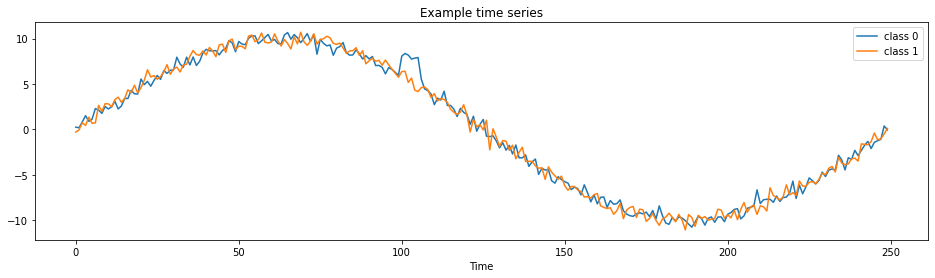

In [21]:
# Gunpoint:  0 = young; 1 = old

plot_instance_per_label(X_train, y_train)

## Scale Data

In [22]:
def scale_train_and_test_data(X_train, X_test):
  '''
  input has to be a nested dataframe.
  returns data as numpy array
  '''
  X_training_numpy = from_nested_to_2d_array(X_train).to_numpy()
  X_test_numpy = from_nested_to_2d_array(X_test).to_numpy()
  X_train_prepared_for_scaling = X_training_numpy.transpose()
  X_test_prepared_for_scaling = X_test_numpy.transpose()
  scaler = StandardScaler()
  # turn array to scale across feature space
  X_train_scaled_transposed = scaler.fit_transform(X_train_prepared_for_scaling)
  X_test_scaled_transposed = scaler.fit_transform(X_test_prepared_for_scaling)
  # turn back
  X_train_scaled = X_train_scaled_transposed.transpose()
  X_test_scaled = X_test_scaled_transposed.transpose()
  print("--SCALING")
  print("Standard deviation first row after scaling train data -  first instance: ", X_train_scaled[0].std())
  print("Mean first row after scaling train data - first instance: ", X_train_scaled[0].mean())
  print("\n")

  return X_train_scaled, X_test_scaled 

In [23]:
X_train_scaled_dummy, X_test_scaled_dummy = scale_train_and_test_data(X_train, X_test)

--SCALING
Standard deviation first row after scaling train data -  first instance:  1.0
Mean first row after scaling train data - first instance:  0.0




## Apply rocket (sktime)

In [24]:
def apply_rocket(X_train_scaled, X_test_scaled, rocket, ppv_only = True):
  '''
    Just applies the rocket function to the nested time series data to get the transformed dataframe that
    contains the generated max and ppv features. 
    Moreover some basic adjustments are applied like, comverting the column headers to stringsd to 
    prevent errors later on with the chap package for example.
  '''
  X_train_scaled_df = pd.DataFrame(X_train_scaled)
  X_test_scaled_df = pd.DataFrame(X_test_scaled)
  # create nested df for rocket
  X_train_scaled_df_nested = from_2d_array_to_nested(X_train_scaled_df)
  X_test_scaled_df_nested = from_2d_array_to_nested(X_test_scaled_df)

  rocket.fit(X_train)
  X_train_transform = rocket.transform(X_train_scaled_df_nested)
  X_test_transform = rocket.transform(X_test_scaled_df_nested)
  #convert column names to strings - otherwise error later with shap functions
  X_train_transform.columns = X_train_transform.columns.astype(str)
  X_test_transform.columns = X_test_transform.columns.astype(str)
  if (ppv_only):
    X_train_transform = delete_max_value_features(X_train_transform)
    X_test_transform = delete_max_value_features(X_test_transform)
  else:
    pass

  return X_train_transform, X_test_transform

def delete_max_value_features(transform_dataframe):
  '''
    Deletes the max value features from the dataframe that is generated by rocket. In that dataframe every second feature is a ppv value:
    Columns of genrated df by rocket: max1, ppv1, max2, ppv2, ...
    The index ot the ppv/max feature is referring to the kernel index that generated the ppv/ max feature. 
  '''

  columns_to_keep = []
  for i in range(transform_dataframe.shape[1]):    
      if i%2 == 0:
        is_ppv_feature = True
      else:
        is_ppv_feature = False

      if is_ppv_feature: 
        columns_to_keep.append(i)    
  
  df_only_ppv_features = transform_dataframe.iloc[:,columns_to_keep]
  return df_only_ppv_features

In [25]:
rocket = Rocket(num_kernels=amount_kernels, normalise=False, random_state=123)
X_train_transform_dummy, X_test_transform_dummy = apply_rocket(X_train_scaled_dummy, X_test_scaled_dummy, rocket, ppv_only = True)

## Make Predictions

In [26]:
import sklearn
import xgboost as xgb

# only classifiers with a predict_proba function can be used.
# Important for shap values later. In general it is important that the output of any 
# prediction function are probabilities for each possible class of an instance

from sklearn.ensemble import RandomForestClassifier

#classifier = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
#classifier = sklearn.svm.SVC(kernel='rbf')#, probability=True)
#classifier = xgb.XGBClassifier()
#classifier = RandomForestClassifier()
classifier = sklearn.neighbors.KNeighborsClassifier()

classifier.fit(X_train_transform_dummy, y_train)

#pred_probas = classifier.predict_proba(X_test_transform_dummy)
print("--PREDICTION")
print('Prediction score: ', classifier.score(X_test_transform_dummy, y_test))
#print_accuracy(classifier.predict)
print("\n")
#preds = make_predicitions_and_print_score(classifier, X_train_transform_dummy, X_test_transform_dummy, y_train, y_test)

--PREDICTION
Prediction score:  1.0




In [27]:
# the predictions of the classifier. This time not as probabilities but as integers.
# predictions happen on the previously generated ppv values 
preds = classifier.predict(X_test_transform_dummy)

## Get SHAP values

In [28]:
# use predict_proba for shap
def get_shap_values(classifier, X_train, X_test):
  print("Getting Shap Values...")
  explainer = shap.Explainer(classifier.predict_proba, X_train)
  # max evals has to be at least 2 * num_features +1
  shap_values = explainer(X_test, max_evals= 2* X_test.shape[1] + 1)
  return shap_values

In [29]:
shap_values_dummy = get_shap_values(classifier, X_train_transform_dummy, X_test_transform_dummy)

Getting Shap Values...


Permutation explainer: 51it [01:47,  2.20s/it]


In [30]:
# to check output if nedded
#shap_values_dummy.values[0]

In [31]:
# decision plots only works for kernel explainer

# explainer = shap.KernelExplainer(classifier.predict_proba, X_train_transform_dummy)
# #shap_values = explainer.shap_values(X_test_transform_dummy.iloc[0,:])
# shap_values = explainer.shap_values(X_test_transform_dummy)

In [32]:
# decision plot how proba for classification label = 0 was generated

# shap.initjs()
# shap.decision_plot(explainer.expected_value[0], shap_values[0], X_test_transform_dummy.iloc[0,:])

In [33]:
# shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test_transform_dummy.iloc[0,:])

In [34]:
#  --> all shap values > 0 -->  features that increased probability, that instance is assigend to predicetd class
def get_kernel_indices(shap_values, instance, predicted_label, ppv_only = True):
  '''
  Function to get the indices of important kernels and the relative impact that kernels has accordgin to SHAP.

  instance has to be an integer.
  It specifies which instance of the (test)dataset the shap values are taken of (0 -> first instance of dataset, 1 ->second instance ...) 
  Currently all indices are selected where the shap value is not 0. The returned kernel_list is only valid for the specified instance of the dataset (local point of view).
  Additionally for the specified instance a weight is calculated for each feature according to the respective shap value of a feature - 
  This is done to take the relative importance of features into account later on.
  To get the correct kernel indices it is necessary to know if the predictions were made on a ppv_only dataset.

  predicted_label is the predicition of the classifier for that instance. This is used since we are only interested in those shap values - 
  and therefore those rocket kernels - that pushed the prediction towards the finally predicted class. 
  '''
  kernel_index_list = []
  # to store the relative impact of a kernel according to the shap values.
  shap_weights_for_each_kernel = []
  
  # --> weight = specific_shap_value / shap_values_total

  # these are all the shap values for the specified instance with respect to the predicted label
  # --> if a shap value is positive the corresponding feature increased the likelihood of the instance
  # belonging to the predicted class 
  shap_values_pd_series = pd.DataFrame(shap_values.values[instance])[predicted_label]

  # total is used for the calculation of the relative importance of a feature compared to other features
  shap_values_total = sum(abs(shap_values_pd_series))
  amount_of_features = len(shap_values_pd_series)

  # using all shap values 
  if(use_all_shap_values):
    # going through all shap values of a ts instance 
    for feature_index in range(amount_of_features):
      current_shap_value = shap_values_pd_series[feature_index]

      # when only positive shap values are used for getting activation values
      if(use_only_positive_shap_values):
        if current_shap_value > 0:
          if(ppv_only):
            kernel_index = feature_index
            kernel_index_list.append(kernel_index)
            shap_weights_for_each_kernel.append(abs(current_shap_value)/ shap_values_total) # here the weightage of the feature is calculated
          else:
            kernel_index = feature_index //2 # divide feature index by 2 to get the kernel index
            kernel_index_list.append(kernel_index)
      # when all shap values are considered for getting activation values - no matter positive or negative, but has to be Not zero!
      else:
        if current_shap_value != 0:
          if(ppv_only):
            kernel_index = feature_index
            kernel_index_list.append(kernel_index)
            shap_weights_for_each_kernel.append(abs(current_shap_value)/ shap_values_total) # here the weightage of the feature is calculated
          else:
            kernel_index = feature_index //2 # divide feature index by 2 to get the kernel index
            kernel_index_list.append(kernel_index)

  # using shap values inside defined quantile
  else:
    
    quantile_threshold = shap_values_pd_series.quantile(percentile_of_used_kernels) # get threshold for 90 percent quantile
    # pd.Series.where() replaces values where defined condition is false
    shap_values_above_quantile_threshold = shap_values_pd_series.where(shap_values_pd_series > quantile_threshold, 0) #

    for feature_index in range(amount_of_features):
      current_shap_value = shap_values_above_quantile_threshold[feature_index]

      # when only positive shap values are used for getting activation values
      if(use_only_positive_shap_values):
        if current_shap_value > 0:
          if(ppv_only):
            kernel_index = feature_index
            kernel_index_list.append(kernel_index)
            shap_weights_for_each_kernel.append(abs(current_shap_value)/ shap_values_total) # here the weightage of the feature is calculated
          else:
            kernel_index = feature_index //2 # divide feature index by 2 to get the kernel index
            kernel_index_list.append(kernel_index)
      # when all shap values are considered for getting activation values - no matter positive or negative
      else:
          if(ppv_only):
            kernel_index = feature_index
            kernel_index_list.append(kernel_index)
            shap_weights_for_each_kernel.append(abs(current_shap_value)/ shap_values_total) # here the weightage of the feature is calculated
          else:
            kernel_index = feature_index //2 # divide feature index by 2 to get the kernel index
            kernel_index_list.append(kernel_index)



  return kernel_index_list, shap_weights_for_each_kernel

In [35]:
# predicted labels for each instance
preds

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0])

In [36]:
kernel_indices_per_ts_instance = []
# each identified important kernel has a corresponding shap weightage
shap_weights_per_ts_instance = []

for i in range(len(X_test_scaled_dummy)):

  predicted_label_for_instance = preds[i]
  kernel_indices, shap_weights = get_kernel_indices(shap_values_dummy, i, predicted_label_for_instance , ppv_only=True)
  kernel_indices_per_ts_instance.append(kernel_indices)
  shap_weights_per_ts_instance.append(shap_weights)

In [37]:
def get_kernel_parameters(fitted_rocket_classifier, kernel_index):  
  '''
    Function to get the kernel parameters of the previously identified important kernels.
    These parameters are later used to re-apply the kernels to the time series, to get
    the information of how a kernel created a ppv value. 
  '''
  # initialize parameter dict
  kernel_parameters = {
    'kernel_number' : kernel_index,
    'weights'   : [],
    'length'    : 0,
    'bias'      : 0,
    'dilation'  : 0,
    'padding'   : 0
 }

  # taken from GitHub repo Theissler: https://github.com/ml-and-vis/interpretable-ts-classification/blob/main/XAI_Rocket/scripts/TimeSeriesXAI_RocketNN%20-%20Kopie.ipynb
  length = fitted_rocket_classifier.kernels[1][kernel_index]
  weights = np.zeros(length, dtype=np.float64)
  AmountOfWeigths = sum(fitted_rocket_classifier.kernels[1][0:kernel_index])
  weights = fitted_rocket_classifier.kernels[0][AmountOfWeigths: AmountOfWeigths+length]
  bias = fitted_rocket_classifier.kernels[2][kernel_index]
  dilation = fitted_rocket_classifier.kernels[3][kernel_index]
  padding = fitted_rocket_classifier.kernels[4][kernel_index]

  # assign retrieved values to dictionary
  kernel_parameters['weights'] = np.float64(weights)
  kernel_parameters['length'] = np.int32(length)
  kernel_parameters['bias'] = np.int32(bias)
  kernel_parameters['dilation'] = np.int32(dilation)
  kernel_parameters['padding'] = np.int32(padding)

  return kernel_parameters #weights, length, bias, dilation, padding

In [38]:
# for each ts instance there are different amounts of kernels that are classified as important by SHAP.
# --> For eacht ts instance get the kernel parameters for each identified important kernel
kernel_params_list_per_ts_instance = []

# for each ts instance of the test dataset
for i in range(len(X_test_scaled_dummy)):
  # for each kernel there are parameters that are stored in a dictionary according to function "get_kernel_parameters"
  # depending on how many kernels are important there will be parameter dictionarys stored in the 
  # kernel_params_list
  kernel_params_list = []

  # for each important kernel for current ts instance i
  for j in range(len(kernel_indices_per_ts_instance[i])):

    kernel_params = get_kernel_parameters(rocket, kernel_indices_per_ts_instance[i][j])
    kernel_params_list.append(kernel_params)

  print("For Time Series instance", i, "a total of" , len(kernel_params_list), "kernels are identified as important.")
  kernel_params_list_per_ts_instance.append(kernel_params_list)
  print("----")

For Time Series instance 0 a total of 131 kernels are identified as important.
----
For Time Series instance 1 a total of 124 kernels are identified as important.
----
For Time Series instance 2 a total of 131 kernels are identified as important.
----
For Time Series instance 3 a total of 104 kernels are identified as important.
----
For Time Series instance 4 a total of 107 kernels are identified as important.
----
For Time Series instance 5 a total of 111 kernels are identified as important.
----
For Time Series instance 6 a total of 101 kernels are identified as important.
----
For Time Series instance 7 a total of 146 kernels are identified as important.
----
For Time Series instance 8 a total of 132 kernels are identified as important.
----
For Time Series instance 9 a total of 136 kernels are identified as important.
----
For Time Series instance 10 a total of 131 kernels are identified as important.
----
For Time Series instance 11 a total of 116 kernels are identified as import

In [39]:
# check
# number has to be the same as output above for the specified instance
len(shap_weights_per_ts_instance[49])

127

## Get ppv highlighting Values

In [40]:
# njit only works when numpy arrays are used in a function. In this approach pandas Dataframes are used.
# --> Future Work
#@njit(fastmath = True)

def apply_kernel_and_get_ppv_list2(time_series_instance, kernel_params, shap_weight, use_multiplication_positive, use_absolute_weights): 

    '''
    This is the apply_kernel function https://github.com/angus924/rocket/blob/master/code/rocket_functions.py
    Of Dempster et.al.:
          @article{dempster_etal_2020,
          author = {Dempster, Angus and Petitjean, Fran\c{c}ois and Webb, Geoffrey I},
          title = {ROCKET: Exceptionally fast and accurate time classification using random convolutional kernels},
          year = {2020},
          journal = {Data Mining and Knowledge Discovery},
          doi = {https://doi.org/10.1007/s10618-020-00701-z}}

    This function is used and modified to apply the previously identified important kernels again on the ts instances of the test set to extract the information of
    how a ppv value is generated and which time points of a ts specifically were involved.

    kernel_params are the previously extracted kernel parameters for a important kernel.
    shap_weight is the relative influence a ppv value created by this kernel according to SHAP.
    time_series_instance is the current time series instance.

    lines are marked as added if not present in the original code.
    '''
    weights = kernel_params['weights'] # added
    length = kernel_params['length'] # added
    bias = kernel_params['bias'] # added
    dilation = kernel_params['dilation'] # added
    padding = kernel_params['padding'] # added

    input_length = len(time_series_instance) # modified

    output_length = (input_length + (2 * padding)) - ((length - 1) * dilation)

    activation_dataframe = pd.DataFrame() # added
    activation_dataframe['activation'] = list(np.zeros(input_length)) # added
    
    _ppv = 0
    _max = np.NINF

    end = (input_length + padding) - ((length - 1) * dilation)
    
    ppv_positive_index_list = [] # added
   
    for i in range(-padding, end):

        _sum = bias

        index = i       
        
        time_point = index + padding # added
        
        # first list [] represents the location of the weight in the time series during acticvation
        # second list [] is the index of the weight inside the "weights" list (i.e. which weight of the kernel it actually was)
        weight_locations = ([],[]) # added

        # for each weight of the kernel
        for j in range(length):
            
            if index > -1 and index < input_length:

                _sum = _sum + weights[j] * time_series_instance[index]
                
                current_weight_location = index # added

                if(use_multiplication_positive):

                  # only weights that contribute to reaching the threshold of ppv activation (>0) are considered
                  if weights[j]*time_series_instance[index] > 0: # added
                    weight_locations[0].append(current_weight_location) # added
                    weight_locations[1].append(j) # added
                    
                else:
                  weight_locations[0].append(current_weight_location) # added
                  weight_locations[1].append(j) # added

            index = index + dilation
        
        if _sum > _max:
            _max = _sum

        if _sum > 0:
            _ppv += 1

            # len(weight_locations[0]) --> the amount of locations in the time series where a weight contributed to a ppv activation
            for i in range(len(weight_locations[0])):
              # weight_locations[0][i] --> position in the time series 
              # weight_locations[1][i] --> the actual weight of the kernel on that ts position
              if(use_absolute_weights):
                if(use_shap_weightage):
                  # this is the activation dataframe for one kernel
                  activation_dataframe['activation'][weight_locations[0][i]] += (abs(weights[weight_locations[1][i]])) * shap_weight # impact of kernel is weighted here based on shap values 
                else:
                  activation_dataframe['activation'][weight_locations[0][i]] += (abs(weights[weight_locations[1][i]])) # impact of kernel is NOT weighted here based on shap values 
              else:
                if(use_shap_weightage):
                  activation_dataframe['activation'][weight_locations[0][i]] += (weights[weight_locations[1][i]]) * shap_weight # impact of kernel is weighted here based on shap values 
                else:
                  activation_dataframe['activation'][weight_locations[0][i]] += weights[weight_locations[1][i]] # impact of kernel is NOT weighted here based on shap values 

    # ppv and max values are actually not used but kept here to keep clear what was added to the function
    return _ppv / output_length, _max, activation_dataframe

In [41]:
def get_activation_dataframes(X_test_scaled, kernel_params_list_per_ts_instance, shap_weights_per_ts_instance, use_multiplication_positive, use_absolute_weights):
  '''
    This function applies the identified important kernels and extracts actiavation dataframes for each times series instance.
    Each ts instance can have different amounts of activation dataframes, depending on how many kernels were identified as important.
    Finally a nested list is returned. The first level of that list represents the ts instance. The next (deeper) level of the list
    represents the different kernel activations of that ts instance. 
  '''
  print("\n")
  print("--Getting activations for each instance")
  print("\n")
  activation_dataframes_per_ts_instance = []

  # for each ts instance of the test set
  for i in range(len(X_test_scaled)):
    print("-------- INSTANCE", i," STARTING--------")
    print("...")
    ts_instance = X_test_scaled[i]
    # the shap weights for the different kernels for the current ts instance
    current_shap_weights = shap_weights_per_ts_instance[i]
    activation_dataframes = []

    # for each identified important kernel for current ts instance
    for j in range(len(kernel_params_list_per_ts_instance[i])):

      # mind the difference between current_shap_weights and current_weight (s at the end)
      current_shap_weight = current_shap_weights[j]
      ppv, max, activation_df = apply_kernel_and_get_ppv_list2(ts_instance, kernel_params_list_per_ts_instance[i][j], current_shap_weight, use_multiplication_positive, use_absolute_weights) 
      activation_dataframes.append(activation_df)

    activation_dataframes_per_ts_instance.append(activation_dataframes)
    print("-------- INSTANCE", i," FINISHED--------")
    print("----")
  
  return activation_dataframes_per_ts_instance

In [42]:
activation_dataframes_per_ts_instance = get_activation_dataframes(X_test_scaled_dummy, kernel_params_list_per_ts_instance, shap_weights_per_ts_instance, use_multiplication_positive = weight_multiplication_positive, use_absolute_weights = absolute_weight_values)



--Getting activations for each instance


-------- INSTANCE 0  STARTING--------
...
-------- INSTANCE 0  FINISHED--------
----
-------- INSTANCE 1  STARTING--------
...
-------- INSTANCE 1  FINISHED--------
----
-------- INSTANCE 2  STARTING--------
...
-------- INSTANCE 2  FINISHED--------
----
-------- INSTANCE 3  STARTING--------
...
-------- INSTANCE 3  FINISHED--------
----
-------- INSTANCE 4  STARTING--------
...
-------- INSTANCE 4  FINISHED--------
----
-------- INSTANCE 5  STARTING--------
...
-------- INSTANCE 5  FINISHED--------
----
-------- INSTANCE 6  STARTING--------
...
-------- INSTANCE 6  FINISHED--------
----
-------- INSTANCE 7  STARTING--------
...
-------- INSTANCE 7  FINISHED--------
----
-------- INSTANCE 8  STARTING--------
...
-------- INSTANCE 8  FINISHED--------
----
-------- INSTANCE 9  STARTING--------
...
-------- INSTANCE 9  FINISHED--------
----
-------- INSTANCE 10  STARTING--------
...
-------- INSTANCE 10  FINISHED--------
----
-------- INSTANCE 1

In [43]:
# len(activation_dataframes_per_ts_instance[0]) means for time series instance 0 there are x amount of kernels that were important. For each kernel there is an activation dataframe
# activation_dataframes_per_ts_instance[0][1] --> kernel 1 of ts instance 0
# activation_dataframes_per_ts_instance[0][2] --> kernel 2 of ts instance 0 and so on....
len(activation_dataframes_per_ts_instance[0])

131

In [44]:
def plot_activations_as_bars(activations):
  '''
    If desired the activations of all the kernels for a ts instance can be plotted
  '''
  #fig, axes = plt.subplots(1, len(activations) , figsize=plt.figaspect(0.5))

  for i in range(len(activations)):
    y_pos = np.arange(len(activations[i]))
    heights = activations[i].to_numpy().reshape(1,-1)[0] #weird but otherwise plotting does not work --> activations have to be accessed as lists in some way
    #print(heights.reshape(1,-1))
    plt.bar(y_pos, heights)
    
    plt.show()

In [45]:
#plot_activations_as_bars(activation_dataframes_per_ts_instance[0])

## Creating activation dataframes

In [46]:
activations_first_instance =  pd.concat(activation_dataframes_per_ts_instance[0], axis = 1)

In [47]:
# this dataframe represents the activations for each kernel for one ts instance
# one column is one kernel
# the index of each row refers to the index in the time series and therefore the timepoint
# to get the average activation across kernels for each time ppoint the mean has to be calculated along the horitontal axis
activations_first_instance

,activation,activation,activation,activation,activation,activation,activation,activation,activation,activation,...,activation,activation,activation,activation,activation,activation,activation,activation,activation,activation
0,0.000000,-0.001201,0.0,0.000000,0.000000,-0.005530,-0.013402,-0.021275,-0.030204,-0.002806,...,-0.002516,0.0,0.0,-0.004867,-0.026808,-0.002665,0.0,0.0,-0.001419,0.000000
1,0.002571,-0.001201,0.0,0.000000,0.002187,-0.005530,-0.013402,-0.021275,-0.006760,-0.002806,...,-0.003405,0.0,0.0,-0.004867,-0.022769,0.000000,0.0,0.0,-0.001419,0.000000
2,-0.003302,-0.001201,0.0,0.000000,0.000000,-0.003894,-0.013402,-0.021275,-0.006760,-0.002806,...,-0.002112,0.0,0.0,-0.004867,-0.026808,0.000000,0.0,0.0,-0.001419,0.000000
3,-0.002818,-0.001201,0.0,0.000000,-0.005909,-0.003894,-0.013402,-0.021275,-0.030204,-0.002806,...,-0.003566,0.0,0.0,-0.004867,-0.026808,-0.002665,0.0,0.0,-0.001419,0.000000
4,0.020034,0.000539,0.0,0.000000,0.000000,-0.003227,-0.013402,-0.028541,0.008021,-0.001398,...,-0.000933,0.0,0.0,-0.004867,-0.022769,0.001416,0.0,0.0,-0.001279,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.005740,0.000114,0.0,0.007406,0.000000,0.002823,0.000000,0.038570,0.002919,0.001362,...,0.004859,0.0,0.0,0.000000,0.012220,0.003856,0.0,0.0,0.002535,-0.009691
246,-0.004380,0.000114,0.0,0.007406,0.000000,0.004507,0.000000,0.043583,0.016043,0.001362,...,0.001995,0.0,0.0,0.000000,0.013227,-0.002250,0.0,0.0,0.003121,-0.005712
247,-0.022028,0.000114,0.0,0.007406,0.000000,0.004507,0.000000,0.043583,0.004083,0.001362,...,0.000321,0.0,0.0,0.000000,0.013227,-0.003848,0.0,0.0,0.003121,-0.003705
248,0.000000,0.000114,0.0,0.015609,0.000000,0.001911,0.000000,0.043583,0.002240,0.001362,...,0.003246,0.0,0.0,0.000000,0.013227,-0.002250,0.0,0.0,0.003121,-0.003356


In [48]:
# scaling of single kernel activations
if (scale_each_kernel_before_mean):
  if(min_max_scale):
    scaler = MinMaxScaler()
    scaled_kernel_activations = pd.DataFrame(scaler.fit_transform(activations_first_instance))
  if(standard_scale):
    scaler = StandardScaler()
    scaled_kernel_activations = pd.DataFrame(scaler.fit_transform(activations_first_instance))

In [49]:
# check mean or std for each column if desired (to check if StandardScaling worked for example)
np.std(scaled_kernel_activations, axis=0)

0      0.210113
1      0.219472
2      0.147887
3      0.157983
4      0.134180
         ...   
126    0.223222
127    0.178921
128    0.200324
129    0.157317
130    0.224886
Length: 131, dtype: float64

In [50]:
if(scale_each_kernel_before_mean):
  activations_first_instance = scaled_kernel_activations
# calculating mean across column for each row, column with mean appended to the end
activations_first_instance['mean'] = activations_first_instance.mean(axis=1)
activations_first_instance

,0,1,2,3,4,5,6,7,8,9,...,122,123,124,125,126,127,128,129,130,mean
0,0.515823,0.104976,0.49322,0.519691,0.500000,0.237662,0.095934,0.284063,0.117545,0.000000,...,0.480623,0.517262,0.172968,0.000000,0.356490,0.481252,0.5,0.451291,0.491663,0.390790
1,0.554088,0.104976,0.49322,0.519691,0.559274,0.237662,0.095934,0.284063,0.414399,0.000000,...,0.480623,0.517262,0.172968,0.076585,0.543348,0.481252,0.5,0.451291,0.491663,0.413775
2,0.466675,0.104976,0.49322,0.519691,0.500000,0.320250,0.095934,0.284063,0.414399,0.000000,...,0.480623,0.517262,0.172968,0.000000,0.543348,0.481252,0.5,0.451291,0.491663,0.406663
3,0.473872,0.104976,0.49322,0.519691,0.339830,0.320250,0.095934,0.284063,0.117545,0.000000,...,0.480623,0.517262,0.172968,0.000000,0.356490,0.481252,0.5,0.451291,0.491663,0.397370
4,0.814028,0.574363,0.49322,0.519691,0.500000,0.353946,0.095934,0.211938,0.601566,0.259736,...,0.480623,0.517262,0.172968,0.076585,0.642599,0.481252,0.5,0.468196,0.491663,0.481500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.601259,0.459782,0.49322,0.747589,0.500000,0.659384,0.411097,0.878108,0.536968,0.769236,...,0.480623,0.517262,0.500000,0.740005,0.813663,0.481252,0.5,0.929170,0.254682,0.551087
246,0.450632,0.459782,0.49322,0.747589,0.500000,0.744369,0.411097,0.927875,0.703145,0.769236,...,0.480623,0.517262,0.500000,0.759097,0.385616,0.481252,0.5,1.000000,0.351986,0.561746
247,0.187935,0.459782,0.49322,0.747589,0.500000,0.744369,0.411097,0.927875,0.551705,0.769236,...,0.480623,0.517262,0.500000,0.759097,0.273554,0.481252,0.5,1.000000,0.401048,0.523242
248,0.515823,0.459782,0.49322,1.000000,0.500000,0.613345,0.411097,0.927875,0.528364,0.769236,...,0.480623,0.517262,0.500000,0.759097,0.385616,0.481252,0.5,1.000000,0.409598,0.545987


In [51]:
# do that for all instances now (also applies to scaling)
average_activations_per_instance = []

for i in range(len(activation_dataframes_per_ts_instance)):
  activations_for_current_instance = activation_dataframes_per_ts_instance[i]
  activation_dataframe = pd.concat(activations_for_current_instance, axis = 1)
  # scaling each kernel activation before calculating mean
  if (scale_each_kernel_before_mean):
    if(min_max_scale):
      scaler = MinMaxScaler()
      activation_dataframe = pd.DataFrame(scaler.fit_transform(activation_dataframe))
    if(standard_scale):
      scaler = StandardScaler()
      activation_dataframe = pd.DataFrame(scaler.fit_transform(activation_dataframe))
  # calculating mean activation across all kernels for ts instance
  activation_dataframe['mean'] = activation_dataframe.mean(axis=1)
  average_activations_per_instance.append(activation_dataframe['mean'].tolist())

In [52]:
average_activations_dataframe = pd.DataFrame(average_activations_per_instance)

In [53]:
# each row is an instance of the test set. each column value is a timepoints average activation across all relevant kernels
# values not scaled yet
average_activations_dataframe

,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,0.390790,0.413775,0.406663,0.397370,0.481500,0.438117,0.433506,0.482892,0.427501,0.413336,...,0.465969,0.496217,0.555093,0.539301,0.534388,0.551087,0.561746,0.523242,0.545987,0.539995
1,0.419951,0.393956,0.404135,0.407282,0.412833,0.417469,0.412306,0.434772,0.456348,0.477975,...,0.527168,0.546634,0.532400,0.519131,0.549361,0.561075,0.591124,0.573165,0.593536,0.588013
2,0.392037,0.401392,0.397919,0.377941,0.440613,0.433873,0.419047,0.395004,0.423731,0.395053,...,0.544587,0.550587,0.570406,0.565660,0.565581,0.569152,0.537249,0.544452,0.562575,0.574184
3,0.391509,0.399522,0.416104,0.458636,0.372726,0.427857,0.422659,0.431939,0.440538,0.485438,...,0.539748,0.566738,0.496351,0.574041,0.554592,0.572174,0.559914,0.597075,0.583445,0.554788
4,0.408277,0.409105,0.405504,0.421490,0.418994,0.428893,0.457662,0.470971,0.442375,0.414762,...,0.511194,0.536682,0.533291,0.560316,0.513400,0.544998,0.535169,0.575543,0.580655,0.538204
5,0.396561,0.403970,0.390952,0.434495,0.427291,0.381455,0.416490,0.471248,0.457246,0.400409,...,0.523837,0.507464,0.497136,0.544100,0.561791,0.458217,0.542502,0.547160,0.537853,0.535578
6,0.342093,0.380336,0.363951,0.384759,0.391646,0.430153,0.436718,0.438075,0.475366,0.456487,...,0.572574,0.571118,0.577439,0.474469,0.539469,0.568132,0.555012,0.576131,0.599862,0.577276
7,0.409952,0.417752,0.372550,0.392716,0.467969,0.513439,0.421347,0.445577,0.359688,0.435007,...,0.516895,0.535734,0.561151,0.570328,0.601128,0.587950,0.537061,0.551879,0.556927,0.581605
8,0.386467,0.386790,0.395408,0.438257,0.375143,0.450816,0.381745,0.442900,0.432065,0.505254,...,0.544109,0.471109,0.557258,0.545655,0.559322,0.526690,0.591214,0.524178,0.563908,0.549841
9,0.407345,0.370331,0.386606,0.418574,0.400235,0.456558,0.411274,0.401364,0.445185,0.488040,...,0.569172,0.542363,0.525119,0.560006,0.539017,0.578083,0.532658,0.537491,0.562067,0.579286


In [54]:
# each row is min max scaled across x axis. 
# This helps to get a standardizes range for the color mapping of the relevance vectors

scaler = MinMaxScaler()
vectors = average_activations_dataframe.values
scaled_rows = scaler.fit_transform(vectors.T).T
scaled_average_activations_dataframe = pd.DataFrame(scaled_rows)
# renaming the variable here to reload the section below when wantin gto plot different percentile visualizations
average_activations_dataframe_before_plotting = scaled_average_activations_dataframe # scaled now

## Defining percentile for visualization

This section can be rerun before plotting to define the amount of information to be displayed when visualizing. A percentile can be defined as a threshold. All activation values below that threshold will be set to zero. E.g. if 90 is used as the percentile then all activations values below the 90th percentile will be set to zero. This was not part of the paper, can be explored.

In [55]:
# Wether to focus on top values of the activation for visualizations or not
focus_activation_on_top_values = False

# if 90 is selected e.g. only the activation values in the 90th percentile are used 
# only relvenat if focus_activation_on_top_values is True
percentile = 90 

In [56]:
# setting activation values that are not in the 90% quantile to zero

if(focus_activation_on_top_values):
  average_activations_dataframe = average_activations_dataframe_before_plotting
  for i in range(len(average_activations_dataframe)):
    # get row values
    current_instance = average_activations_dataframe.iloc[i]
    p = np.percentile(current_instance, percentile) # get threshold for defined percentile
    values_as_np  = np.array(current_instance) # convert to numpy for np.argwhere function
    positions_below_threshold = np.argwhere(values_as_np < p)
    for j in range(len(current_instance)):
      
      if j in positions_below_threshold:
        average_activations_dataframe.iloc[i,j] = 0
else:
  # nothing is done, only naming the variable back to fit the instructions below
  average_activations_dataframe = average_activations_dataframe_before_plotting


## Plotting

In [57]:
def get_ppv_activation_df2(scaled_activations_df, X_test_numpy_instance):
  '''
    This function is used to make plotting easier later on. It generates a dataframe for each ts instance with three columns:
    index, time_points and activations_values. index is the index of the time point in the ts instance, time_points refers to the actual value at that index
    and activation_values contains the extracted activation at eacht location in the time series.
    The dataframe for each ts instance is stored in a list which is returned in the end.
  '''

  activations_dataframes_with_timepoints = []
  for i in range(len(scaled_activations_df)):

    df_ppv_act = pd.DataFrame()
    df_ppv_act['index'] = list(np.arange(len(scaled_activations_df.iloc[i])))
    df_ppv_act['time_points']  = list(X_test_numpy_instance[i])
    df_ppv_act['activation_values'] = scaled_activations_df.iloc[i]

    activations_dataframes_with_timepoints.append(df_ppv_act)

  return activations_dataframes_with_timepoints

In [58]:
# for plotting
average_activation_per_ts_instance_dataframes = get_ppv_activation_df2(average_activations_dataframe, X_test_scaled_dummy)
#average_activation_per_ts_instance_dataframes

In [59]:
def plot_average_activation(instance_nr, activation_for_all_instances, true_label, pred_label, save_figures, directory_to_save_to):
  '''
    Function to plot one ts instance with its activation as a heatmap. Different color mappings can be selected 
  '''
  print("Plotting average activation across kernels for instance:", instance_nr)
  average_activation = activation_for_all_instances[instance_nr]
  plt.rcParams["figure.figsize"] = (20,5)
  #cmap reference: https://matplotlib.org/stable/gallery/color/colormap_reference.html
  # https://matplotlib.org/stable/tutorials/colors/colormaps.html
  #['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']
  # standard was 'jet
  # looked also good: 'hot', 'seismic'*
  plt.scatter(x = 'index', y= 'time_points', c = 'activation_values' , cmap = 'jet', data=average_activation)
  plt.plot('index', 'time_points', data=average_activation, c = 'black') 
  plt.colorbar()
  plt.title("Instance nr: " + str(instance_nr) + " -- true Label = " + true_label + " -- pred_label = " + pred_label )
  if(save_figures):
    plt.savefig( directory_to_save_to + "instance_nr_" +str(instance_nr) + "_truelabel_" + true_label + " -- pred_label = " + pred_label)
  plt.show()



-------------------------Plotting average activations for each Time series---------------------------


--------------Plotting activation for instances of class:  0
LABEL:0
Plotting average activation across kernels for instance: 0


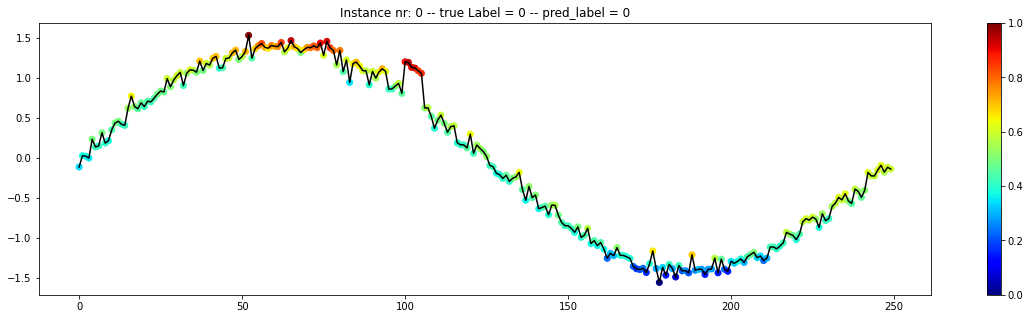

LABEL:0
Plotting average activation across kernels for instance: 2


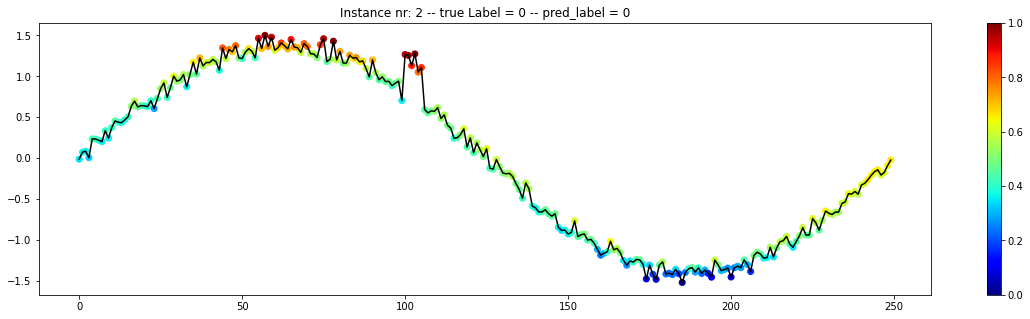

LABEL:0
Plotting average activation across kernels for instance: 4


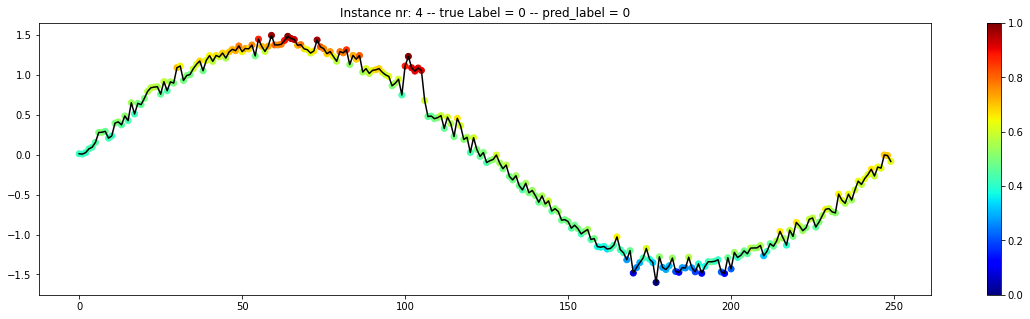

LABEL:0
Plotting average activation across kernels for instance: 7


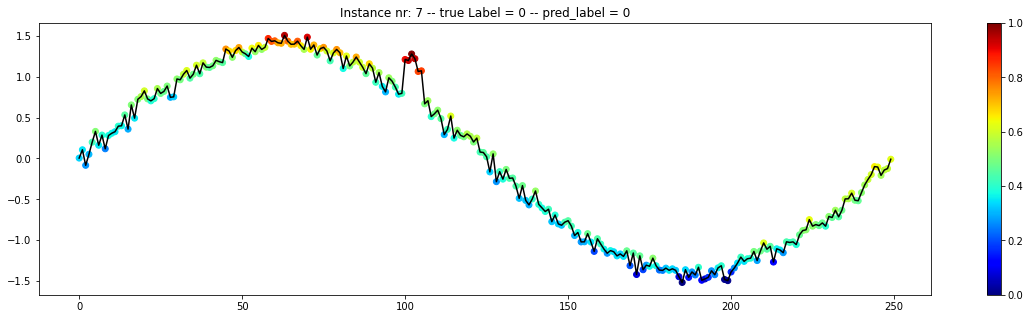

LABEL:0
Plotting average activation across kernels for instance: 10


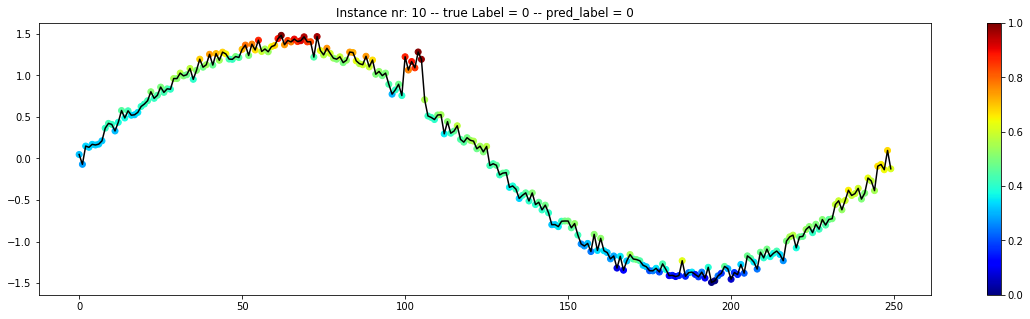

LABEL:0
Plotting average activation across kernels for instance: 15


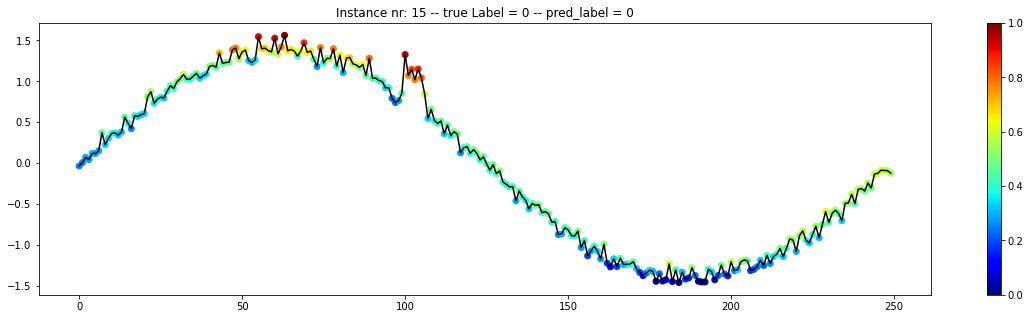

LABEL:0
Plotting average activation across kernels for instance: 16


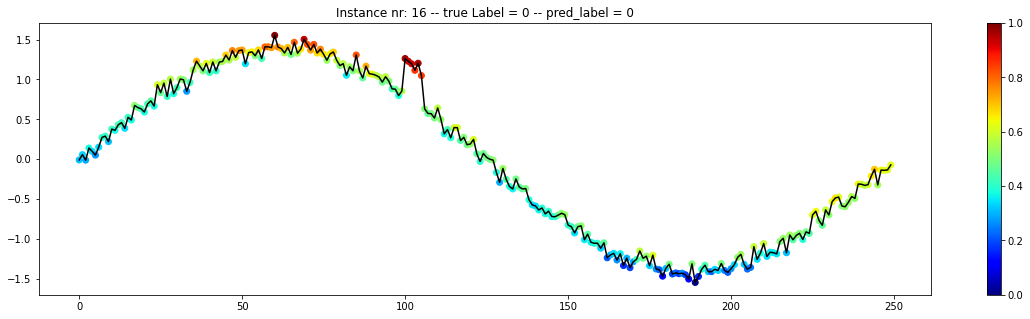

LABEL:0
Plotting average activation across kernels for instance: 19


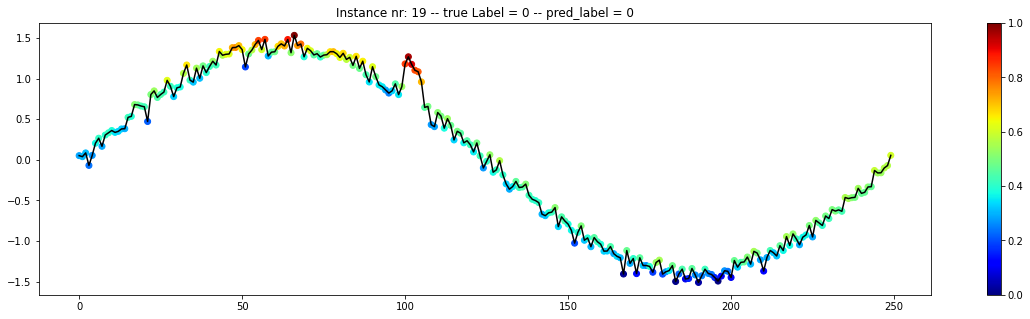

LABEL:0
Plotting average activation across kernels for instance: 21


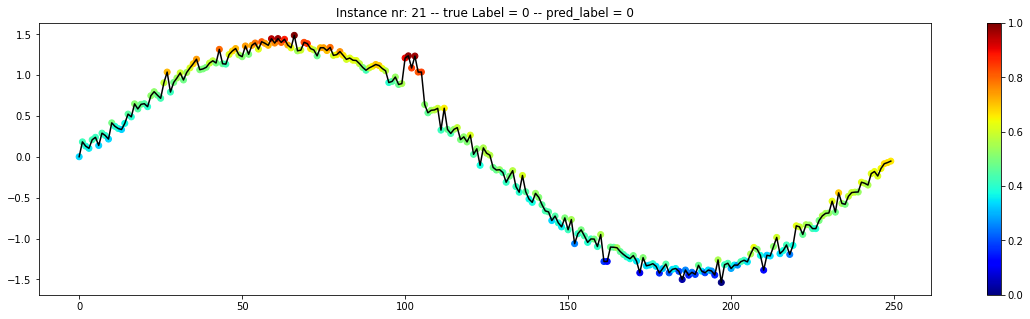

LABEL:0
Plotting average activation across kernels for instance: 25


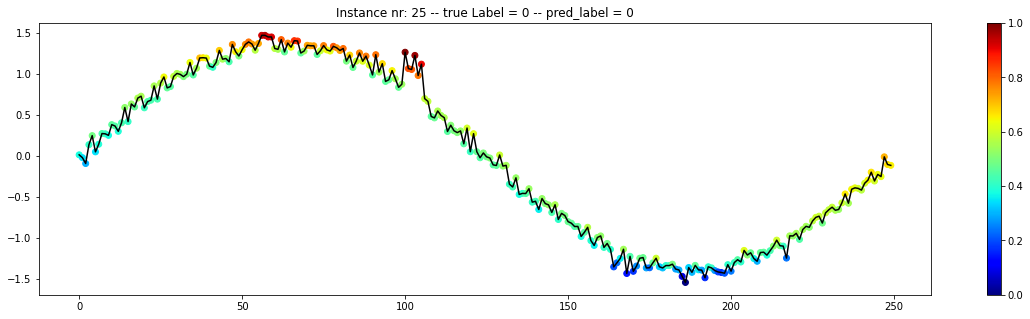

LABEL:0
Plotting average activation across kernels for instance: 27


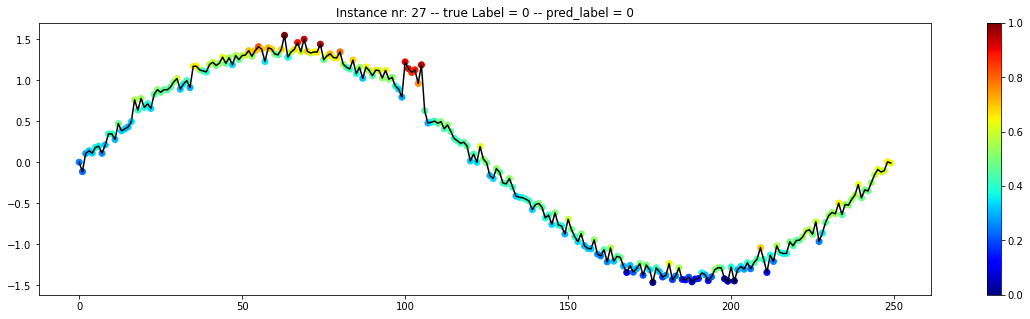

LABEL:0
Plotting average activation across kernels for instance: 29


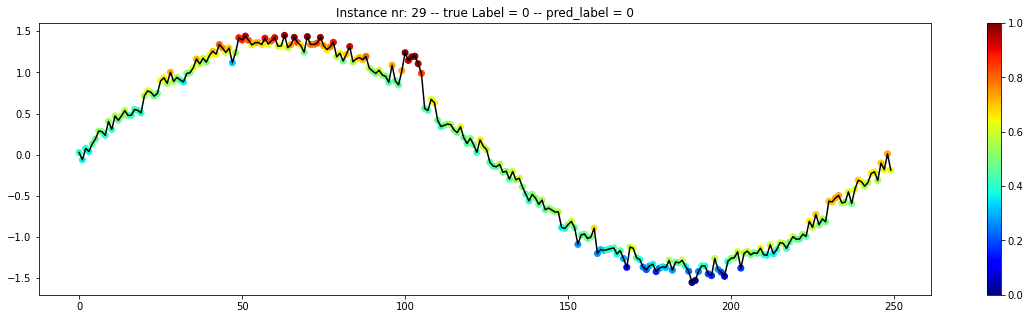

LABEL:0
Plotting average activation across kernels for instance: 30


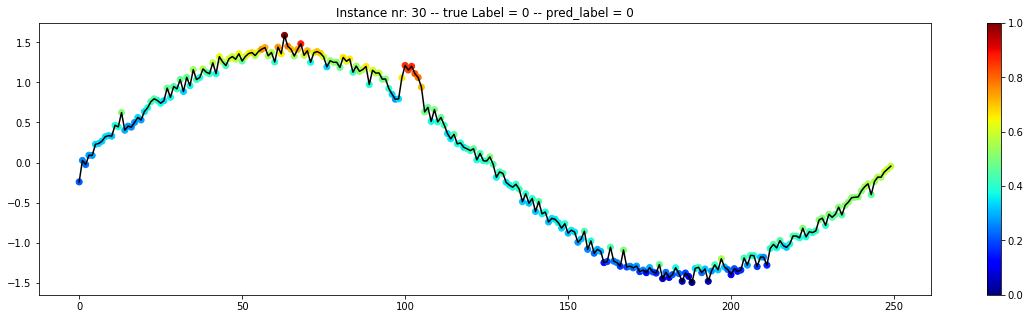

LABEL:0
Plotting average activation across kernels for instance: 31


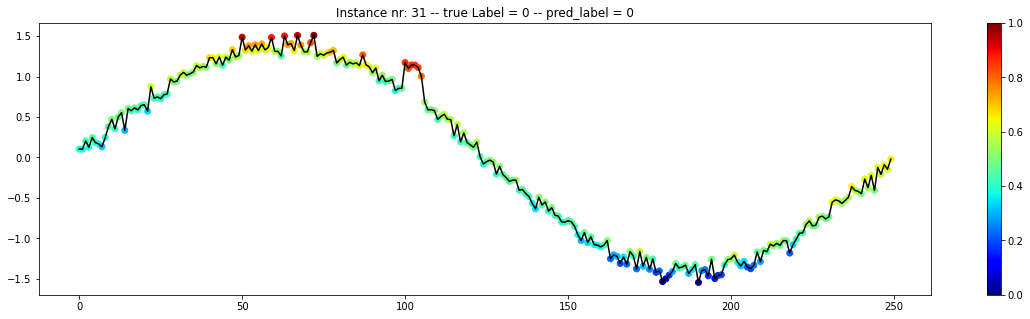

LABEL:0
Plotting average activation across kernels for instance: 34


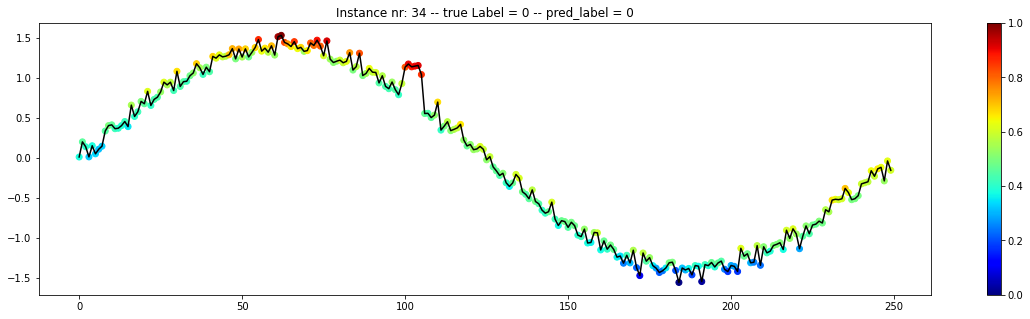

LABEL:0
Plotting average activation across kernels for instance: 38


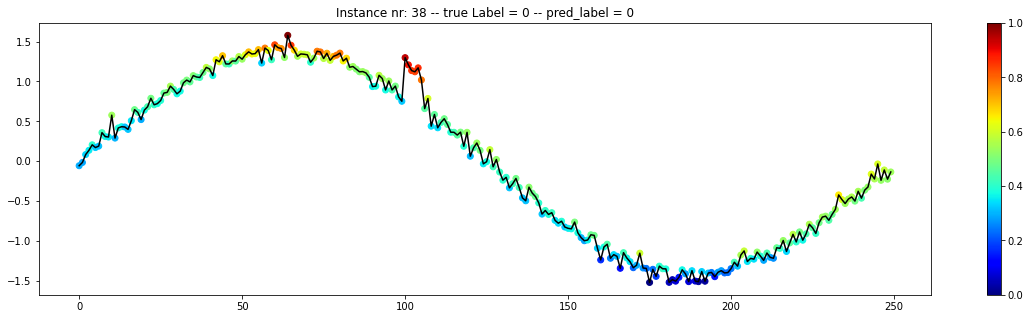

LABEL:0
Plotting average activation across kernels for instance: 40


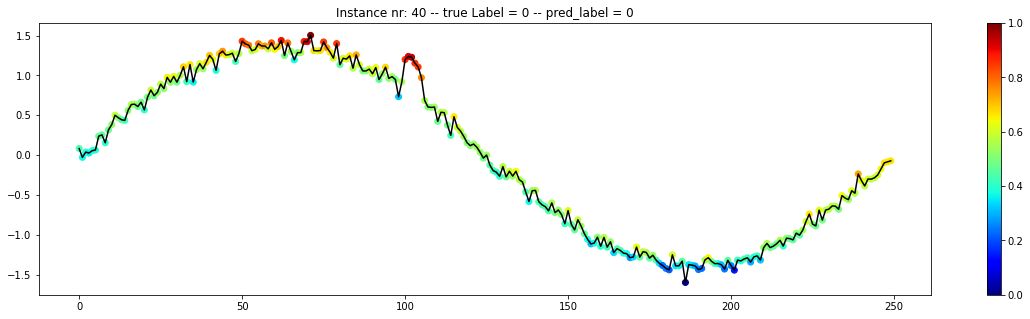

LABEL:0
Plotting average activation across kernels for instance: 43


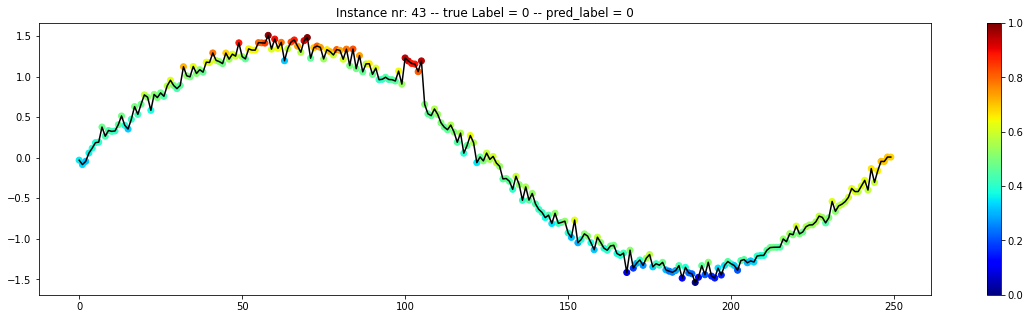

LABEL:0
Plotting average activation across kernels for instance: 44


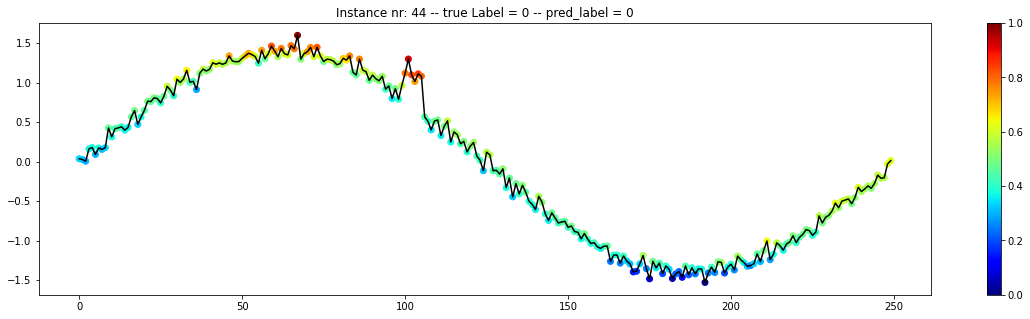

LABEL:0
Plotting average activation across kernels for instance: 46


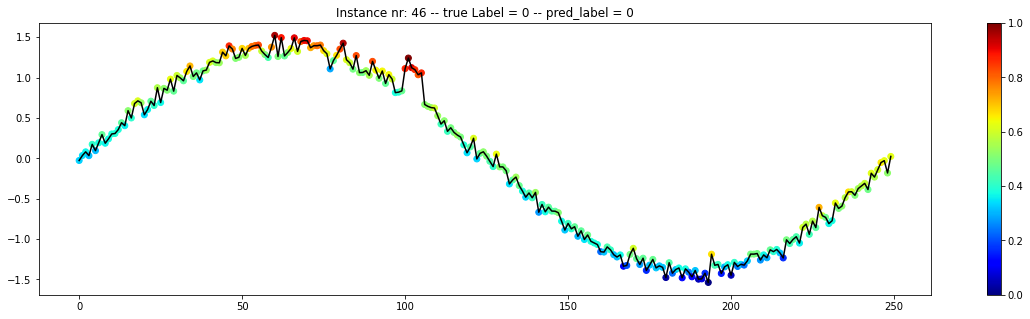

LABEL:0
Plotting average activation across kernels for instance: 49


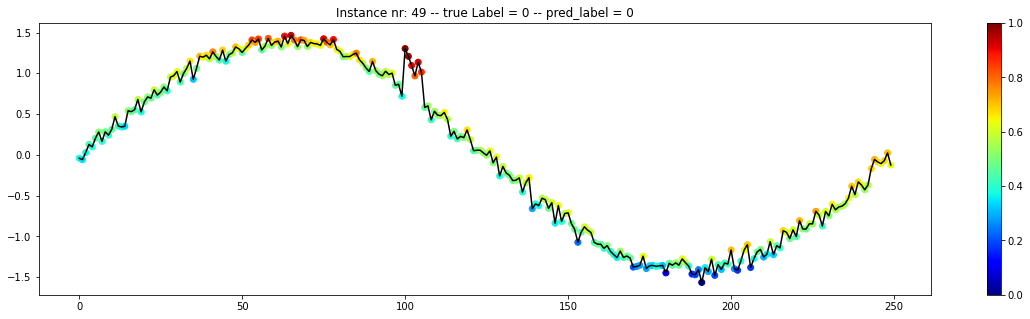

--------------Plotting activation for instances of class:  1
LABEL:1
Plotting average activation across kernels for instance: 1


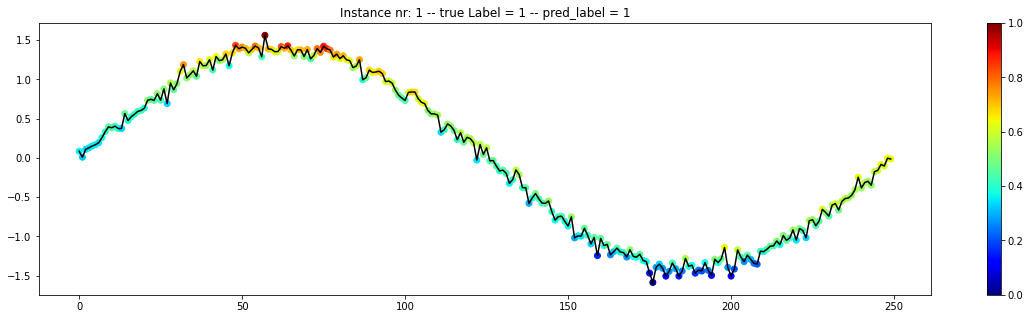

LABEL:1
Plotting average activation across kernels for instance: 3


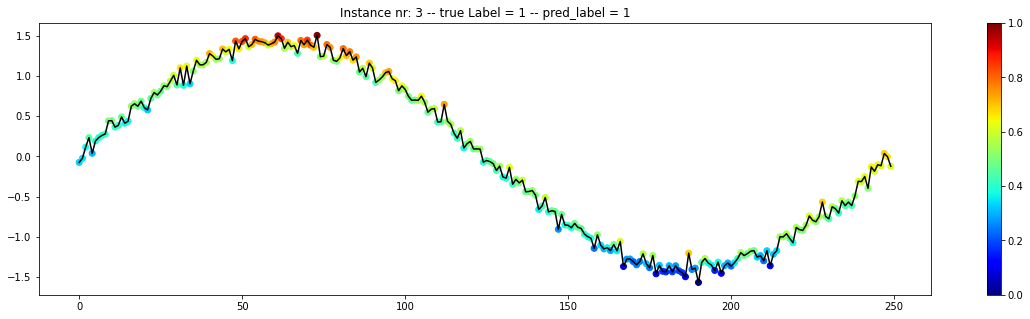

LABEL:1
Plotting average activation across kernels for instance: 5


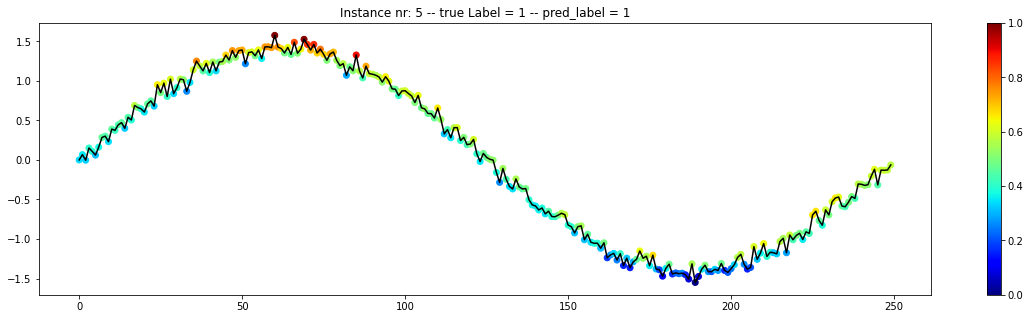

LABEL:1
Plotting average activation across kernels for instance: 6


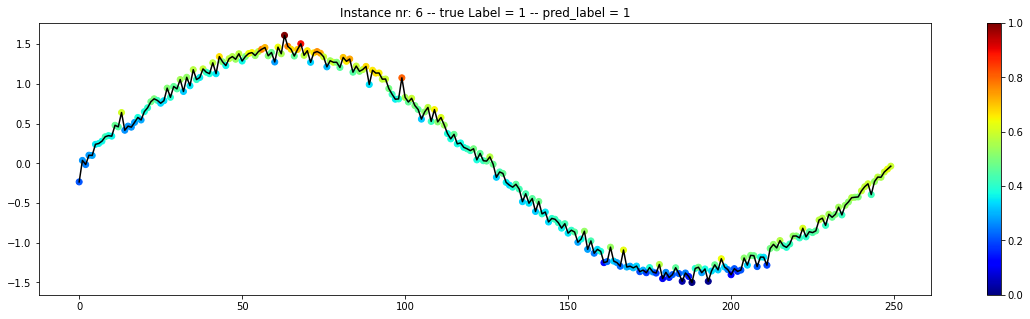

LABEL:1
Plotting average activation across kernels for instance: 8


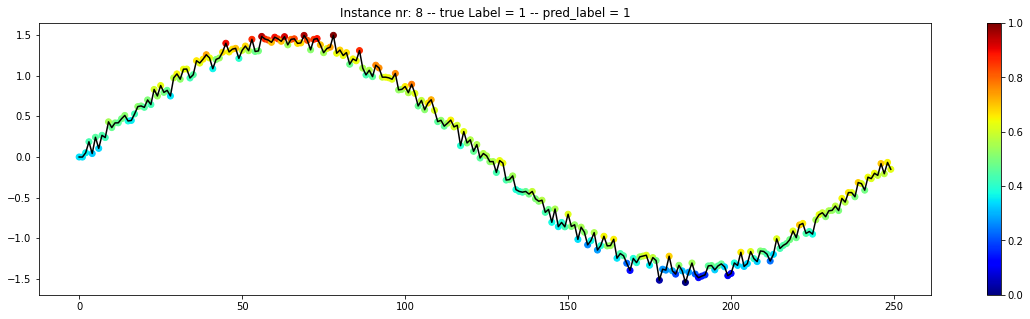

LABEL:1
Plotting average activation across kernels for instance: 9


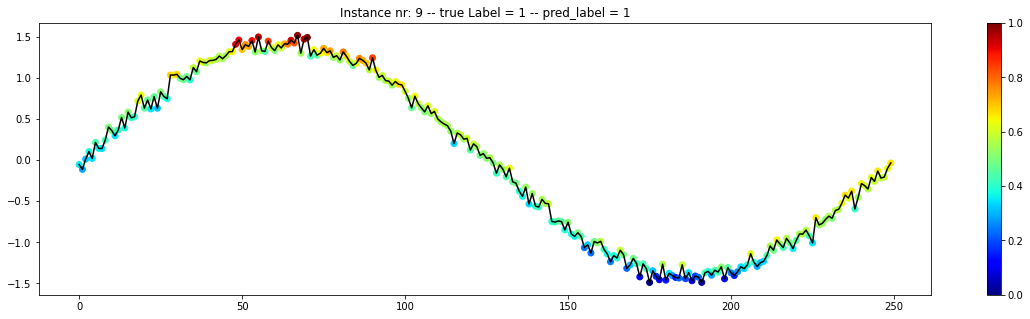

LABEL:1
Plotting average activation across kernels for instance: 11


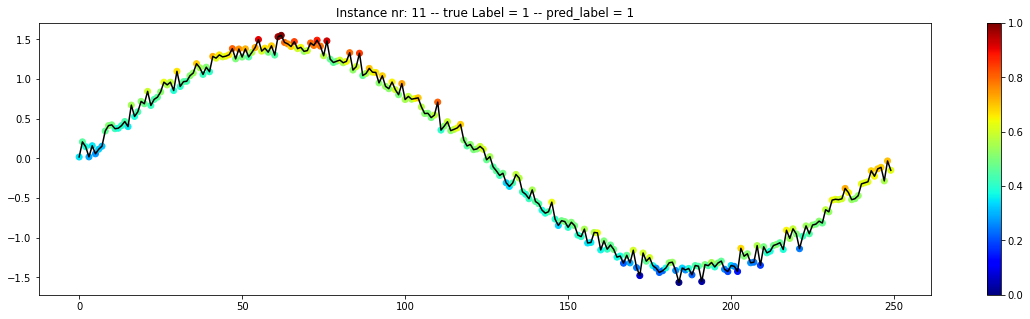

LABEL:1
Plotting average activation across kernels for instance: 12


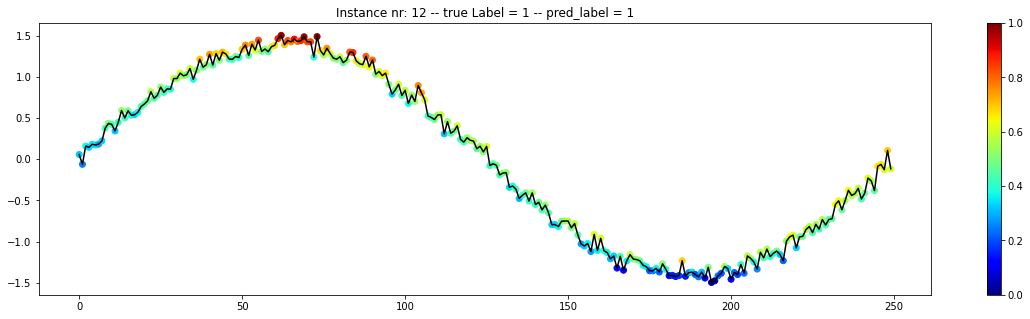

LABEL:1
Plotting average activation across kernels for instance: 13


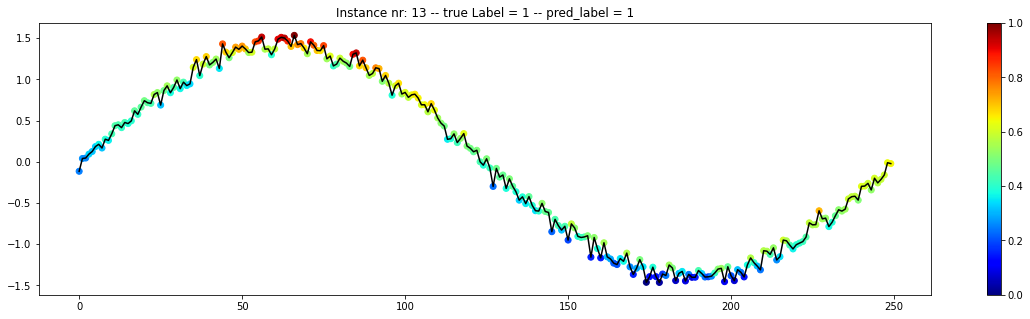

LABEL:1
Plotting average activation across kernels for instance: 14


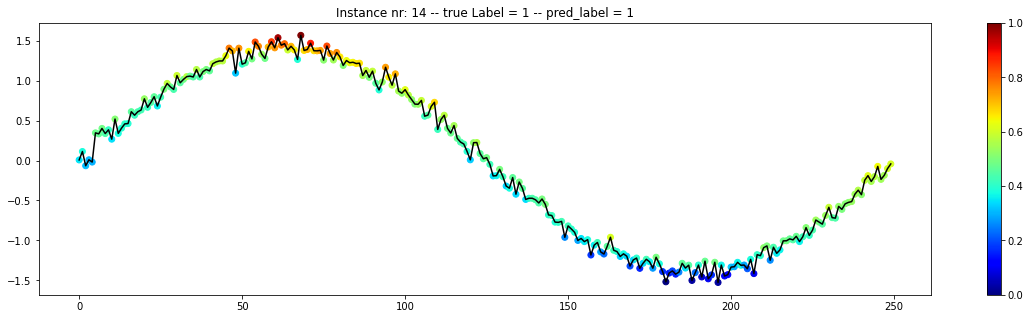

LABEL:1
Plotting average activation across kernels for instance: 17


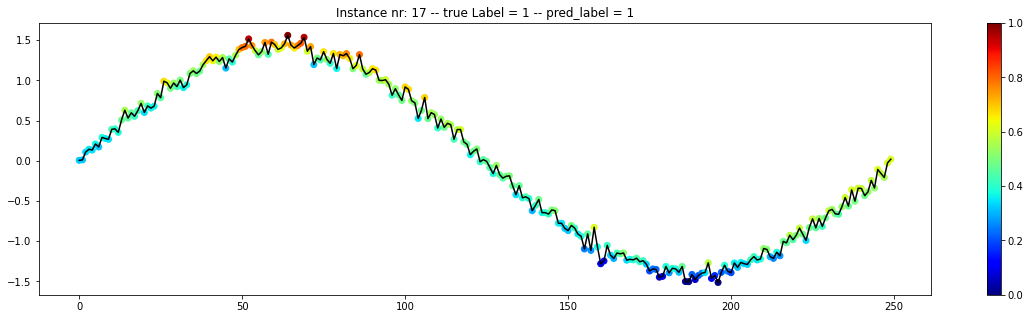

LABEL:1
Plotting average activation across kernels for instance: 18


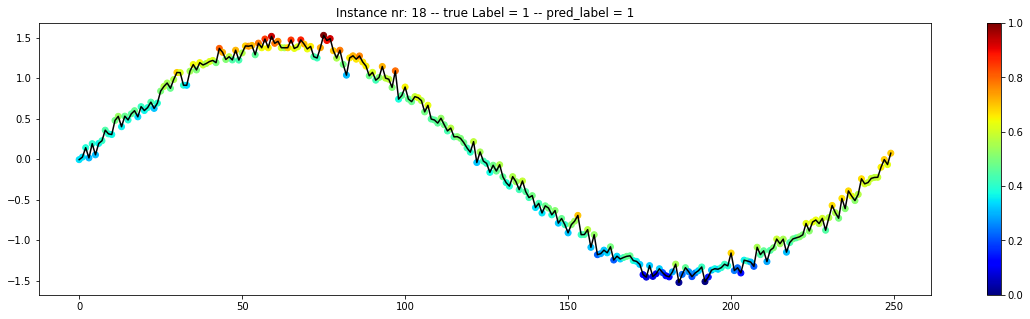

LABEL:1
Plotting average activation across kernels for instance: 20


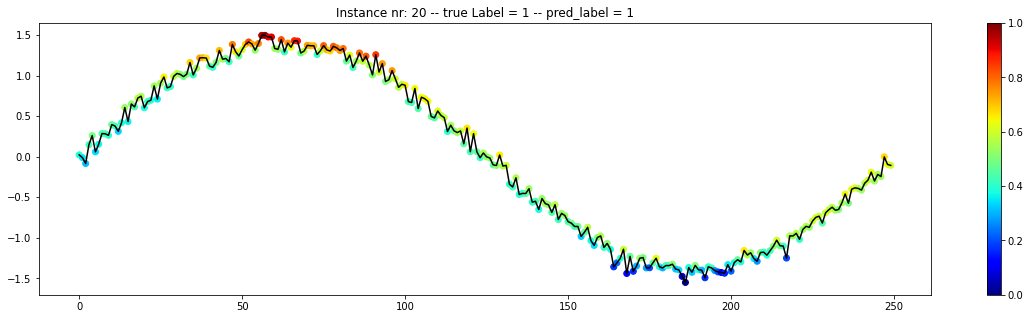

LABEL:1
Plotting average activation across kernels for instance: 22


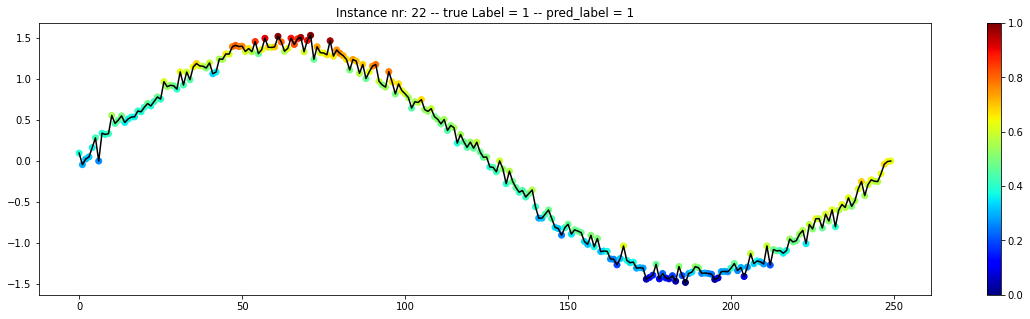

LABEL:1
Plotting average activation across kernels for instance: 23


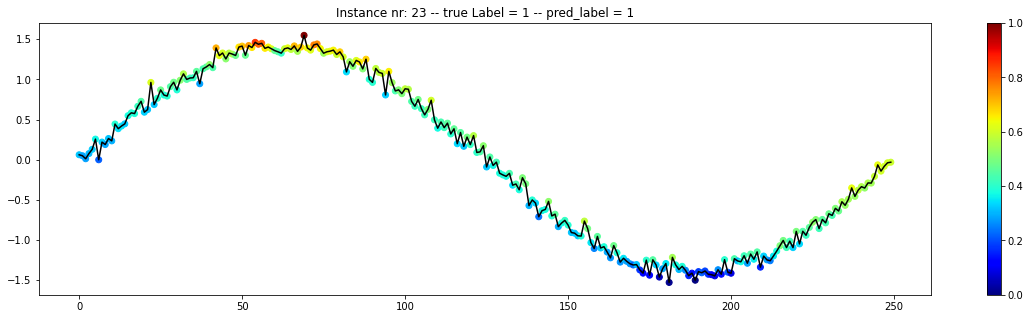

LABEL:1
Plotting average activation across kernels for instance: 24


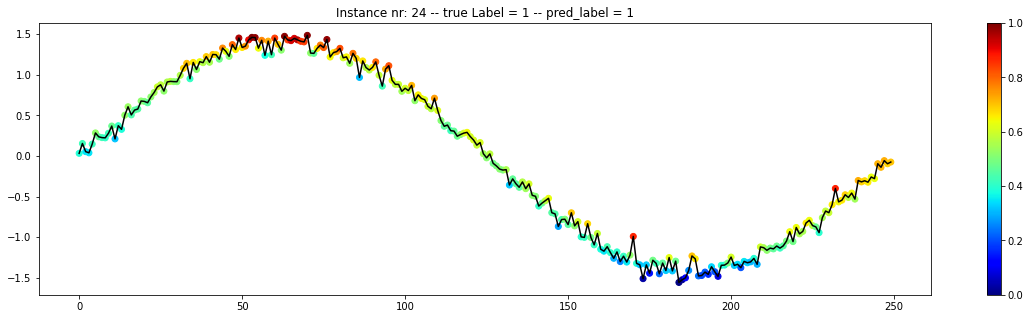

LABEL:1
Plotting average activation across kernels for instance: 26


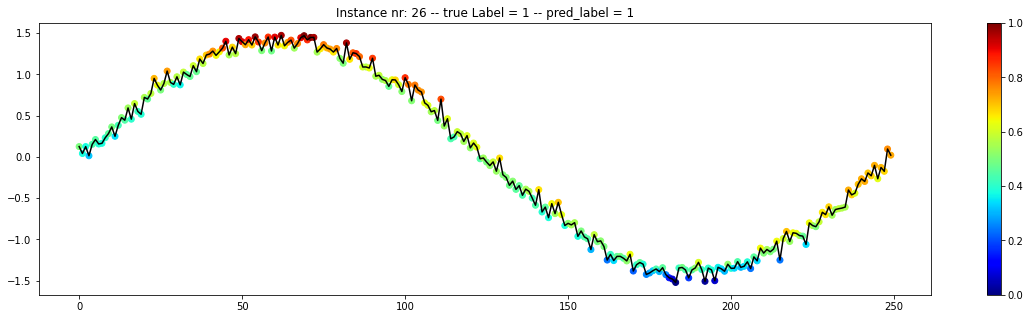

LABEL:1
Plotting average activation across kernels for instance: 28


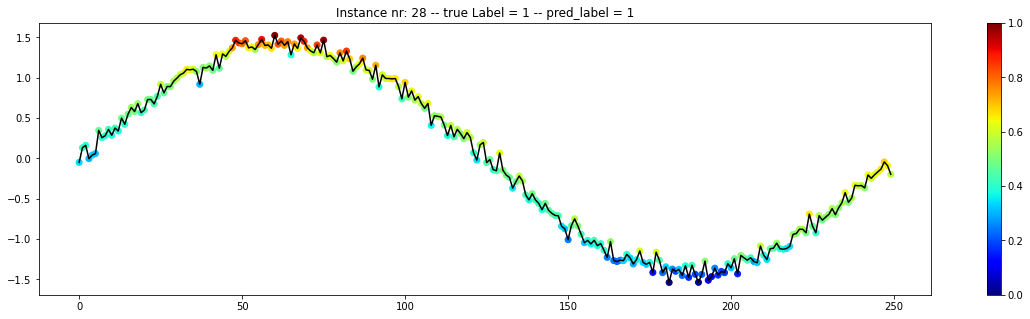

LABEL:1
Plotting average activation across kernels for instance: 32


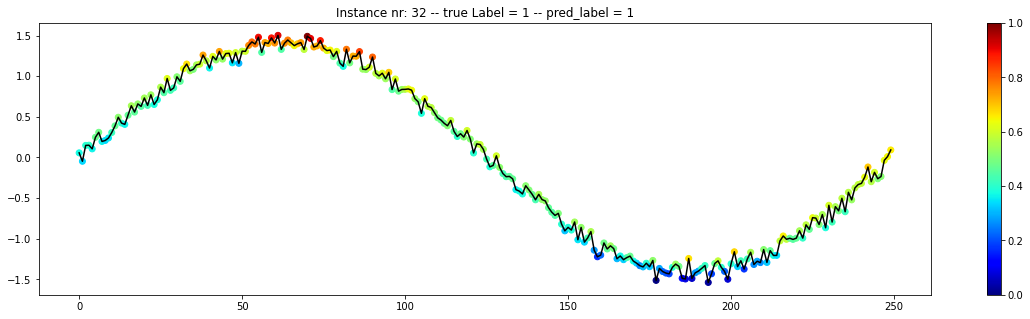

LABEL:1
Plotting average activation across kernels for instance: 33


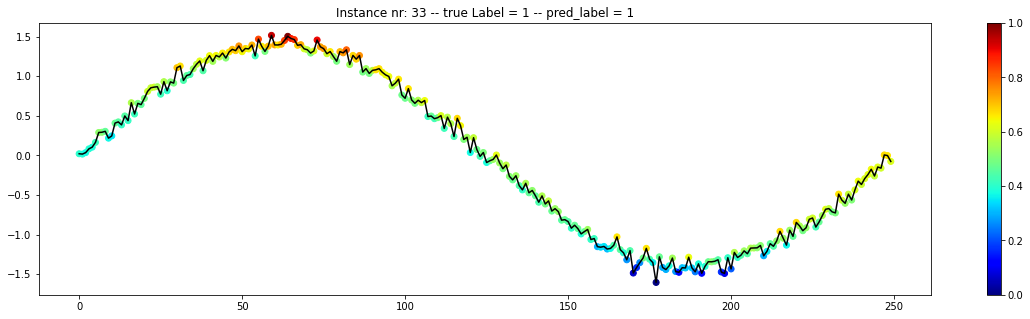

LABEL:1
Plotting average activation across kernels for instance: 35


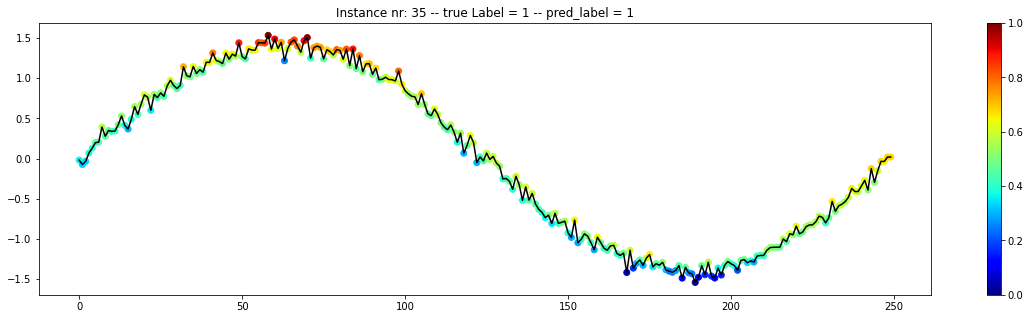

LABEL:1
Plotting average activation across kernels for instance: 36


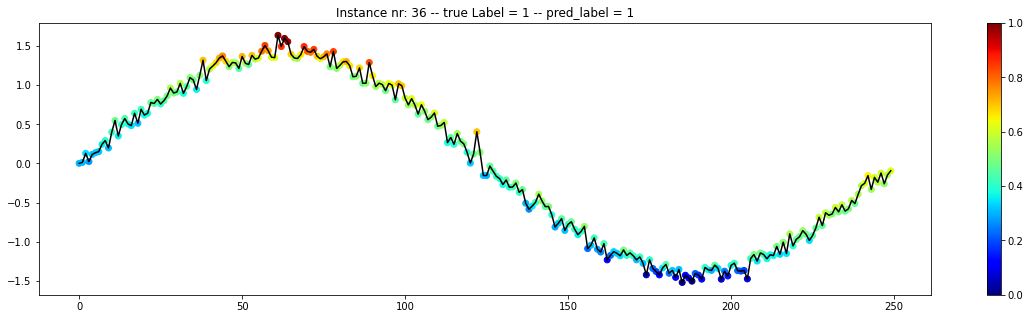

LABEL:1
Plotting average activation across kernels for instance: 37


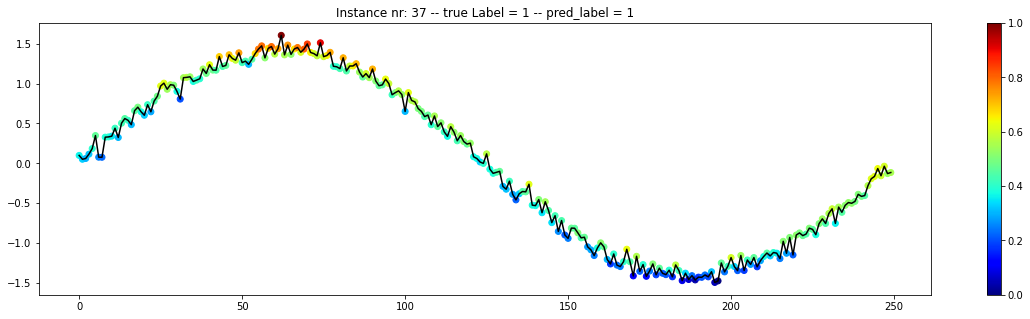

LABEL:1
Plotting average activation across kernels for instance: 39


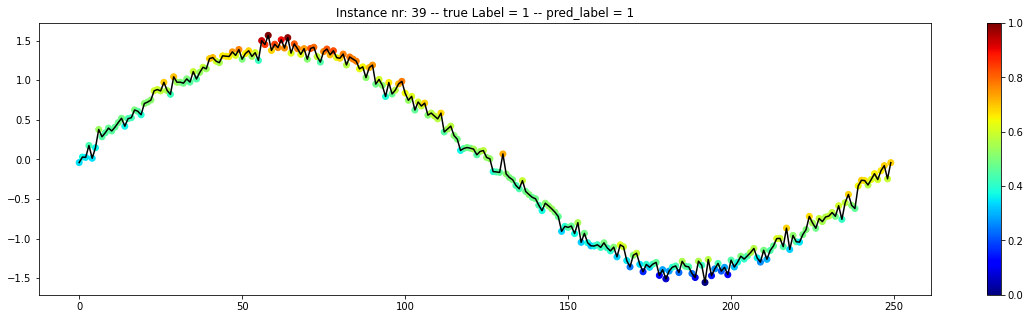

LABEL:1
Plotting average activation across kernels for instance: 41


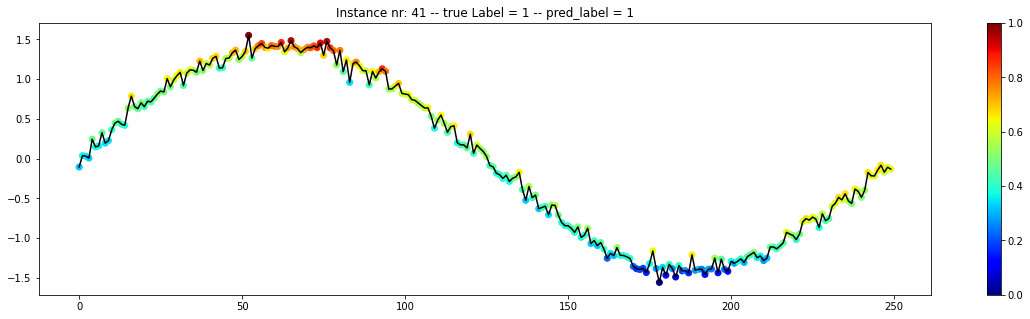

LABEL:1
Plotting average activation across kernels for instance: 42


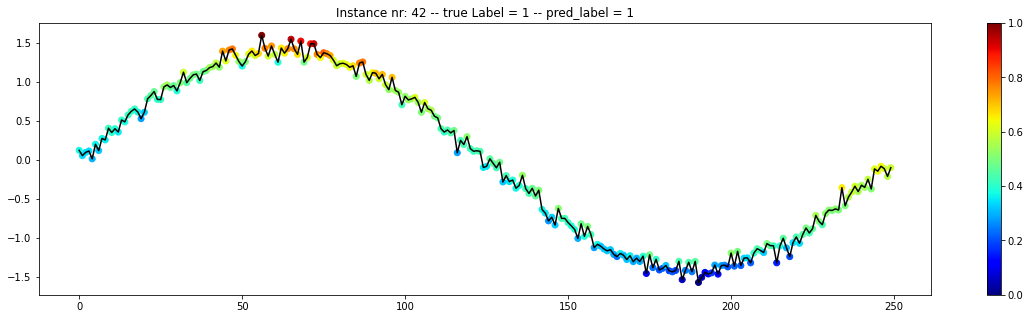

LABEL:1
Plotting average activation across kernels for instance: 45


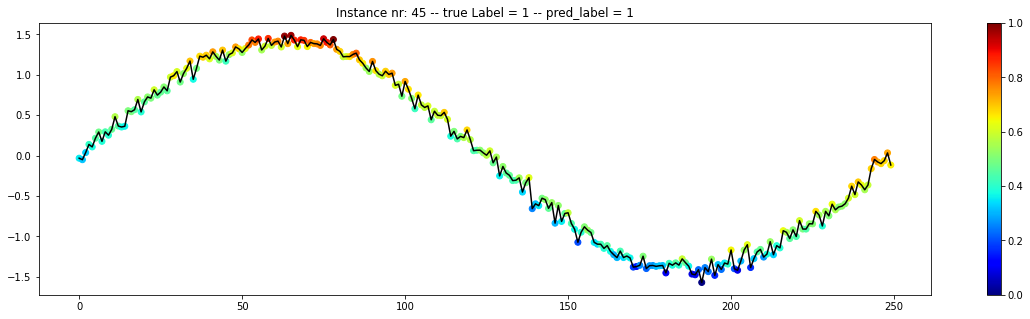

LABEL:1
Plotting average activation across kernels for instance: 47


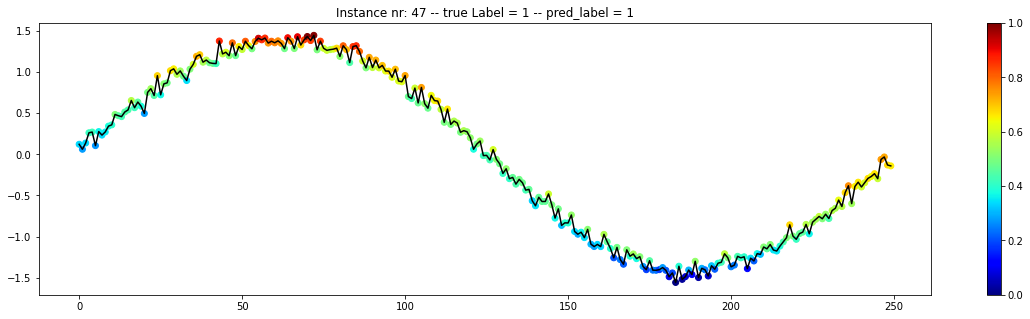

LABEL:1
Plotting average activation across kernels for instance: 48


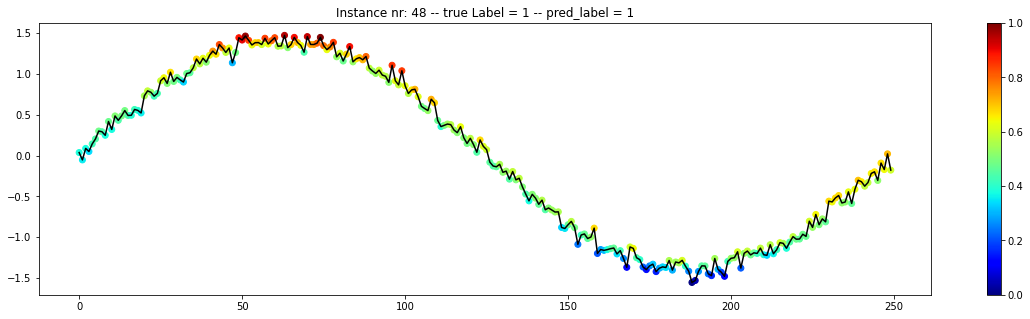

In [60]:
# plot average activation for each instance per label
print("\n")
print("-------------------------Plotting average activations for each Time series---------------------------")
print("\n")
for i in range(len(np.unique(y_test))):

  print("--------------Plotting activation for instances of class: " , np.unique(y_test)[i])

  for j in range(len(X_test_scaled_dummy)):
    # cast y_test to string in case it is integers
    if (type(y_test[0]) == np.str_):
      pass
    else:
      y_test = y_test.astype(np.str_)
    if (y_test[j] == str(i)):
      print("LABEL:" + y_test[j])
      plot_average_activation(instance_nr = j, activation_for_all_instances = average_activation_per_ts_instance_dataframes, true_label = y_test[j], pred_label = str(preds[j]), save_figures = save_figs, directory_to_save_to = directory)

# Quantitative Evaluation

### Relevance Mass Accuracy

In [61]:
# Getting Ground truth area
# anomalie area is defined in "Creating data" section, and is atm 6 timepoints long
# Ground truth area is defined as anomalie_area +- 0.5*length of anomalie
# value needed 
relevance_vectors = average_activation_per_ts_instance_dataframes
ground_truth_start = time_points_for_anomalie

if (anomalie_at_same_location):
  ground_truth_start = time_points_for_anomalie - 3
  ground_truth_end = time_points_for_anomalie + 9
  ground_truth = np.arange(ground_truth_start, ground_truth_end)

  relevance_mass_accuracies_0 = []
  relevance_mass_accuracies_1 = []
  # for every instance in test data - only class 0 --> ground truth is defined for that
  for i in range (len(X_test_transform_dummy)):
    if(y_test[i] == '0'):
      relevance_vector_values = relevance_vectors[i]['activation_values']
      sum_of_relevance_points = sum(relevance_vector_values)
      sum_of_relevance_points_in_ground_truth = 0
      # going through relevance vector now and summing the relevance points in ground truth
      for j in range(len(relevance_vector_values)):
        if j in ground_truth:
          sum_of_relevance_points_in_ground_truth += relevance_vector_values[j]
      
      print("anomalie")
      print("sum_of_relevance_points_gt = " , sum_of_relevance_points_in_ground_truth)
      print("sum_of_relevance_points = " , sum_of_relevance_points)
      print("------------")
      relevance_mass_accuracy =  sum_of_relevance_points_in_ground_truth/sum_of_relevance_points
      relevance_mass_accuracies_0.append(relevance_mass_accuracy)

    if(y_test[i] == '1'):
      relevance_vector_values = relevance_vectors[i]['activation_values']
      sum_of_relevance_points = sum(relevance_vector_values)
      sum_of_relevance_points_in_ground_truth = 0
      # going through relevance vector now and summing the relevance points in ground truth
      for j in range(len(relevance_vector_values)):
        if j in ground_truth:
          sum_of_relevance_points_in_ground_truth += relevance_vector_values[j]
      print("no anomalie")
      print("sum_of_relevance_points_gt = " , sum_of_relevance_points_in_ground_truth)
      print("sum_of_relevance_points = " , sum_of_relevance_points)
      print("------------")
      relevance_mass_accuracy =  sum_of_relevance_points_in_ground_truth/sum_of_relevance_points
      relevance_mass_accuracies_1.append(relevance_mass_accuracy)
# if anomalie not always at same location
# ground truth has to be calculated for each instance
else:
  relevance_mass_accuracies_0 = []
  relevance_mass_accuracies_1 = []
  counter = 0
   # for every instance in test data - only class 0 --> ground truth is defined for that
  for i in range (len(X_test_transform_dummy)):

    if(y_test[i] == '0'):
      ground_truth_start = time_points_for_anomalie[counter] - 3
      counter += 1
      ground_truth_end = ground_truth_start + 9
      ground_truth = np.arange(ground_truth_start, ground_truth_end)

      relevance_vector_values = relevance_vectors[i]['activation_values']
      sum_of_relevance_points = sum(relevance_vector_values)
      sum_of_relevance_points_in_ground_truth = 0
      # going through relevance vector now and summing the relevance points in ground truth
      for j in range(len(relevance_vector_values)):
        if j in ground_truth:
          sum_of_relevance_points_in_ground_truth += relevance_vector_values[j]
      
      print("anomalie")
      print("sum_of_relevance_points_gt = " , sum_of_relevance_points_in_ground_truth)
      print("sum_of_relevance_points = " , sum_of_relevance_points)
      print("------------")
      relevance_mass_accuracy =  sum_of_relevance_points_in_ground_truth/sum_of_relevance_points
      relevance_mass_accuracies_0.append(relevance_mass_accuracy)

    if(y_test[i] == '1'):
      pass # there is no universal ground truth anymore so no way of calculating ground truth for class 1


      # relevance_vector_values = relevance_vectors[i]['activation_values']
      # sum_of_relevance_points = sum(relevance_vector_values)
      # sum_of_relevance_points_in_ground_truth = 0
      # # going through relevance vector now and summing the relevance points in ground truth
      # for j in range(len(relevance_vector_values)):
      #   if j in ground_truth:
      #     sum_of_relevance_points_in_ground_truth += relevance_vector_values[j]
      # print("no anomalie")
      # print("sum_of_relevance_points_gt = " , sum_of_relevance_points_in_ground_truth)
      # print("sum_of_relevance_points = " , sum_of_relevance_points)
      # print("------------")
      # relevance_mass_accuracy =  sum_of_relevance_points_in_ground_truth/sum_of_relevance_points
      # relevance_mass_accuracies_1.append(relevance_mass_accuracy)

anomalie
sum_of_relevance_points_gt =  8.473644875234832
sum_of_relevance_points =  125.8836935848888
------------
no anomalie
sum_of_relevance_points_gt =  6.719494648219092
sum_of_relevance_points =  122.39837776973332
------------
anomalie
sum_of_relevance_points_gt =  8.168876207080283
sum_of_relevance_points =  126.72470252920473
------------
no anomalie
sum_of_relevance_points_gt =  6.562300096503233
sum_of_relevance_points =  124.08805985327443
------------
anomalie
sum_of_relevance_points_gt =  8.665338781653102
sum_of_relevance_points =  137.1147047493271
------------
no anomalie
sum_of_relevance_points_gt =  6.370987122160664
sum_of_relevance_points =  118.57628698103284
------------
no anomalie
sum_of_relevance_points_gt =  5.961064187384806
sum_of_relevance_points =  110.7083072866822
------------
anomalie
sum_of_relevance_points_gt =  8.11791686957522
sum_of_relevance_points =  116.56428869427191
------------
no anomalie
sum_of_relevance_points_gt =  7.424437412562965
sum_

In [62]:
print(len(relevance_mass_accuracies_0))
print(len(relevance_mass_accuracies_1))

21
29


In [63]:
mean_relevance_mass_accuracy_0 = np.mean(relevance_mass_accuracies_0)
mean_relevance_mass_accuracy_1 = np.mean(relevance_mass_accuracies_1)
print(mean_relevance_mass_accuracy_0)
print(mean_relevance_mass_accuracy_1)

0.06590878449414024
0.054872412790286214


In [64]:
std_relevance_mass_accuracy_0 = np.std(relevance_mass_accuracies_0)
std_relevance_mass_accuracy_1 = np.std(relevance_mass_accuracies_1)
print(std_relevance_mass_accuracy_0)
print(std_relevance_mass_accuracy_1)

0.002655302205752016
0.002125555905474528


## Quantitative Evalutation - Perturbation (did not work)
Was not part of paper but can be further explored.

### Setting relevant time points to zero

In [65]:
# trained classifier as classifier
# initialized rocket as rocket
# get "relevance vector"
relevance_vectors = average_activation_per_ts_instance_dataframes
X_test_zero = X_test

In [66]:
X_test_zero["dim_0"].iloc[0]

0     -0.780176
1      0.235812
2      0.191979
3      0.020978
4      1.709590
         ...   
245   -1.048881
246   -0.623028
247   -1.244965
248   -0.806513
249   -0.966502
Length: 250, dtype: float64

In [67]:
# get 90th percentile positions and perturbate for in each instance 

for instance in range(len(X_test['dim_0'])):
  relevance_vector_values = relevance_vectors[instance]['activation_values']
  p = np.percentile(relevance_vector_values, 90) # get threshold for 90th percentile
  relevance_vector_values_np  = np.array(relevance_vector_values) # convert to numpy for np.argwhere function
  positions_above_threshold = np.argwhere(relevance_vector_values_np > p)
  #print(len(positions_above_threshold))
  #positions_above_threshold[0][0]
  for i in range(len(relevance_vector_values)):
    if i in positions_above_threshold:
      X_test_zero["dim_0"].iloc[instance][i] = 0 # set points to zero
    

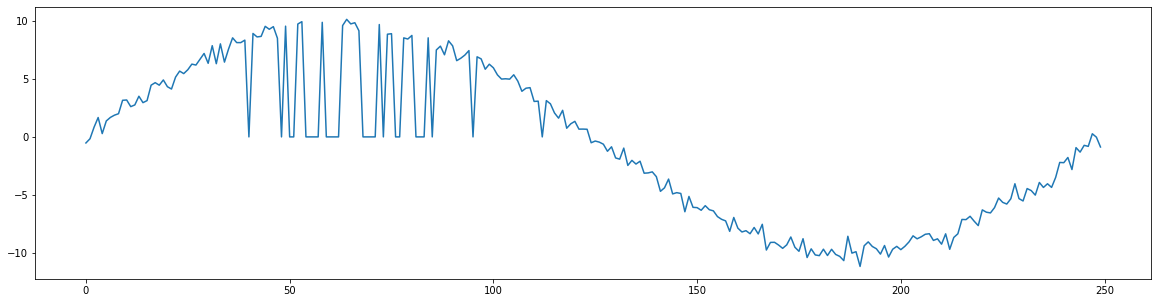

In [68]:
# plotting an instance to check if perturabtion worked
X_test_zero["dim_0"].iloc[3].plot()

In [69]:
# only need test data here
_, X_test_zero_scaled = scale_train_and_test_data(X_test_zero, X_test_zero)
_, X_test_zero_transform = apply_rocket(X_test_zero_scaled, X_test_zero_scaled, rocket, ppv_only = True)

--SCALING
Standard deviation first row after scaling train data -  first instance:  1.0
Mean first row after scaling train data - first instance:  1.1368683772161603e-16




In [70]:
print('Prediction score for t_zero: ', classifier.score(X_test_zero_transform, y_test))

Prediction score for t_zero:  0.0


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [71]:
# make perturbation to 0 for 25 random positions
from random import randrange
X_test_zero_random = X_test


for instance in range(len(X_test['dim_0'])):
  #relevance_vector_values = relevance_vectors[instance]['activation_values']
  #p = np.percentile(relevance_vector_values, 90) # get threshold for 90th percentile
  #relevance_vector_values_np  = np.array(relevance_vector_values) # convert to numpy for np.argwhere function
  #positions_above_threshold = np.argwhere(relevance_vector_values_np > p)

  random_positions = random.sample(range(0, 249), 25) # 25 amount of values 
  #print(len(positions_above_threshold))
  #positions_above_threshold[0][0]
  for i in range(len(relevance_vector_values)):
    if i in random_positions:
      X_test_zero_random["dim_0"].iloc[instance][i] = 0 # set points to zero

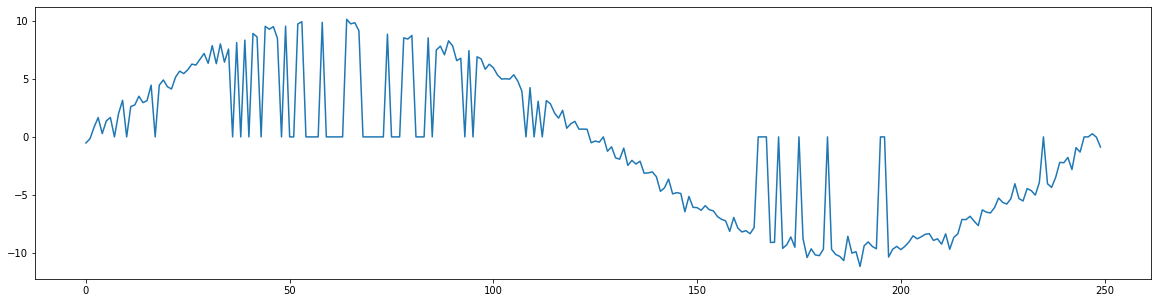

In [72]:
X_test_zero_random["dim_0"].iloc[3].plot()

In [73]:
_, X_test_zero_random_scaled = scale_train_and_test_data(X_test_zero_random, X_test_zero_random)
_, X_test_zero_random_transform = apply_rocket(X_test_zero_random_scaled, X_test_zero_random_scaled, rocket, ppv_only = True)

--SCALING
Standard deviation first row after scaling train data -  first instance:  1.0
Mean first row after scaling train data - first instance:  0.0




In [74]:
print('Prediction score for t_zero_random: ', classifier.score(X_test_zero_random_transform, y_test))

Prediction score for t_zero_random:  0.0


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [75]:
# Conclusion: Perturbating the time series with 0 values and then applying rocket to use a before trained classifier doesnt show any result. probably
# because features are being perturbated that the classifier is not trained on   